# Global Power Plant Database

#### Problem Statement:

## Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database

#### The database includes the following indicators:



- country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- country_long` (text): longer form of the country designation
- name` (text): name or title of the power plant, generally in Romanized form
- gppd_idnr` (text): 10 or 12 character identifier for the power plant
- capacity_mw` (number): electrical generating capacity in megawatts
- latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel` (text): energy source used in primary electricity generation or export
- other_fuel1` (text): energy source used in electricity generation or export
- other_fuel2` (text): energy source used in electricity generation or export
- other_fuel3` (text): energy source used in electricity generation or export
- commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- owner` (text): majority shareholder of the power plant, generally in Romanized form
- source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url` (text): web document corresponding to the `source` field
- geolocation_source` (text): attribution for geolocation information
- wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data` (number): year the capacity information was reported
- generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- generation_data_source` (text): attribution for the reported generation information
- estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

### Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Datasets/main/global_plant_database_IND.csv")

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### Data Analysis

In [4]:
df.head(5)  # checking first rows of the dataset

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  other_fuel3  \
0   28.1839    73.2407        Solar         NaN         NaN          NaN   
1   24.7663    74.6090         Coal         NaN         NaN          NaN   
2   21.9038    69.3732         Wind         NaN         NaN          NaN   
3   23.8712    91.3602          Gas         NaN         NaN          NaN   
4   21.9603    82.4091         Coal         Oil         NaN          NaN   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1                 NaN  Ultratech Cement ltd   
2                 NaN                   AES   
3              2004.0                   NaN   
4              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  wepp_id  year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                    NaN   
1                                   WRI      NaN                    NaN   
2                                   WRI      NaN                    NaN   
3                                   WRI      NaN                 2019.0   
4                                   WRI      NaN                 2019.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN           617.789264              843.747   
4                  NaN          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

   generation_gwh_2019         generation_data_source  \
0                  NaN                            NaN   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN  Central Electricity Authority   
4                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [5]:
df.tail(5)   # checking last rows of the dataset

country country_long                          name   gppd_idnr  \
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     other_fuel3  commissioning_year                                owner  \
902          NaN              2016.0                                  NaN   
903          NaN                 NaN  Karnataka Power Corporation Limited   
904          NaN                 NaN                                  NaN   
905          NaN                 NaN                   Hindustan Zinc ltd   
906          NaN                 NaN                   iEnergy Wind Farms   

                                  source  \
902        Central Electricity Authority   
903  Karnataka Power Corporation Limited   
904                                  CDM   
905                   Hindustan Zinc ltd   
906                                  CDM   

                                                   url geolocation_source  \
902                             http://www.cea.nic.in/                WRI   
903                          http://karnatakapower.com     Industry About   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...                WRI   
905                           http://www.hzlindia.com/                WRI   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...                WRI   

     wepp_id  year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
902      NaN                 2019.0                  NaN                  NaN   
903      NaN                    NaN                  NaN                  NaN   
904      NaN                    NaN                  NaN                  NaN   
905      NaN                    NaN                  NaN                  NaN   
906      NaN                    NaN                  NaN                  NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
902             0.994875            233.59665                865.4   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
902                686.5                  NaN  Central Electricity Authority   
903                  NaN                  NaN                            NaN   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
902                       NaN  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN

In [6]:
df.sample(5)  # checking random rows of the dataset

country country_long                     name   gppd_idnr  capacity_mw  \
51      IND        India                    BANER  IND0000028         12.0   
865     IND        India                 VAITARNA  IND0000493         60.0   
190     IND        India  Dadri Solar Power Plant  WRI1026131          5.0   
820     IND        India                TUTICORIN  IND0000466       1050.0   
683     IND        India                   SALORA  IND0000388        135.0   

     latitude  longitude primary_fuel other_fuel1 other_fuel2  other_fuel3  \
51    32.1686    76.4695        Hydro         NaN         NaN          NaN   
865   19.7674    73.5020        Hydro         NaN         NaN          NaN   
190   28.5787    77.6314        Solar         NaN         NaN          NaN   
820    8.7635    78.1753         Coal         Oil         NaN          NaN   
683   22.4900    82.6062         Coal         Oil         NaN          NaN   

     commissioning_year                owner  \
51               1996.0                  NaN   
865              1976.0                  NaN   
190                 NaN  Government of India   
820              1984.0                  NaN   
683              2014.0                  NaN   

                                        source                     url  \
51               Central Electricity Authority  http://www.cea.nic.in/   
865              Central Electricity Authority  http://www.cea.nic.in/   
190  National Thermal Power Corporation (NTPC)   http://www.ntpc.co.in   
820              Central Electricity Authority  http://www.cea.nic.in/   
683              Central Electricity Authority  http://www.cea.nic.in/   

    geolocation_source  wepp_id  year_of_capacity_data  generation_gwh_2013  \
51                 WRI      NaN                 2019.0                  NaN   
865                WRI      NaN                 2019.0                  NaN   
190     Industry About      NaN                    NaN                  NaN   
820                WRI      NaN                 2019.0                  NaN   
683                WRI      NaN                 2019.0                  NaN   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
51                   NaN                  NaN                  NaN   
865             202.8009             122.0069             152.7524   
190                  NaN                  NaN                  NaN   
820            7043.3290            6501.3730            5089.6550   
683             124.7792               0.0000               0.0000   

     generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
51                   NaN                  NaN                  NaN   
865             203.5969            153.39915                  NaN   
190                  NaN                  NaN                  NaN   
820            4812.8200           5807.85400                  NaN   
683               0.0000              0.00000                  NaN   

            generation_data_source  estimated_generation_gwh  
51                             NaN                       NaN  
865  Central Electricity Authority                       NaN  
190                            NaN                       NaN  
820  Central Electricity Authority                       NaN  
683  Central Electricity Authority                       NaN

In [7]:
df.shape # checking size of the dataset

(907, 27)

### Checking some more dataset rows for better understandings

In [8]:
df.sample(50)

country country_long                                    name   gppd_idnr  \
784     IND        India                                    TAGO  IND0000437   
175     IND        India                           DHUVARAN CCPP  IND0000101   
660     IND        India                 Raksa Solar Power Plant  WRI1026190   
883     IND        India                               VIZAG TPP  IND0000506   
197     IND        India       Dhank - Aravali Solar Power Plant  WRI1026135   
661     IND        India       Ram Tirath Jaga Solar Power Plant  WRI1026191   
859     IND        India                                 URI -II  IND0000487   
170     IND        India                                DHALIPUR  IND0000095   
214     IND        India                               GADARWARA  IND0000539   
434     IND        India  LTML Wind Energy Project in Tamil Nadu  WRI1026344   
172     IND        India                        DHARIWAL INF TPP  IND0000097   
345     IND        India                           KHOPOLI WORKS  WRI1019960   
452     IND        India                          MAHUL REFINERY  WRI1019967   
716     IND        India                         SHRI MALAPRABHA  WRI1019934   
827     IND        India        Talcher Kaniha Solar Power Plant  WRI1026215   
289     IND        India                       JAYKAYPURAM PLANT  WRI1019889   
219     IND        India                              GANDHARBAL  IND0000121   
16      IND        India                                 ANTA GT  IND0000014   
330     IND        India                           KASHIPUR CCPP  IND0000518   
492     IND        India                             MUMBAI ONGC  WRI1020015   
603     IND        India             Panandhro Solar Power Plant  WRI1026180   
9       IND        India                             AMAR KANTAK  IND0000007   
857     IND        India                               URAN ONGC  WRI1019992   
724     IND        India                          SINGRAULI STPS  IND0000415   
379     IND        India                           KUNDARGI MILL  WRI1019925   
465     IND        India                                 MANIYAR  IND0000258   
581     IND        India                              PATALGANGA  WRI1020017   
216     IND        India                                     GAJ  IND0000119   
799     IND        India                              TEESTA-III  IND0000526   
328     IND        India                            KASARGODE DG  IND0000186   
601     IND        India                                  PYKARA  IND0000348   
187     IND        India                        DURG SPONGE IRON  WRI1019998   
174     IND        India                                 DHOLPUR  IND0000099   
700     IND        India                        SEMBCORP GAYATRI  IND0000524   
363     IND        India                                  KORADI  IND0000208   
528     IND        India                          NEPANAGAR MILL  WRI1020008   
433     IND        India                            LOWER SILERU  IND0000240   
304     IND        India               K.N. Ram Kaltek Wind Farm  WRI1026339   
431     IND        India                            LOWER METTUR  IND0000238   
260     IND        India                            HINGOLI MILL  WRI1019957   
11      IND        India                  ANANDPUR SAHIB ST-I&II  IND0000009   
333     IND        India                           KATHALGURI GT  IND0000188   
786     IND        India                            TALCHER STPS  IND0000439   
772     IND        India                          Sonu Wind Farm  WRI1026764   
733     IND        India                          SOUTHERN REPL.  IND0000421   
832     IND        India        Teona Pujarian Solar Power Plant  WRI1026217   
358     IND        India                          KONASEEMA CCCP  IND0000205   
739     IND        India                        SUBERNREKHA I&II  IND0000427   
870     IND        India                           VARDHAM BUDNI  WRI1020010   
256 

### Checking columns

In [9]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

### Checking Target Variables

#### Checking primary_fuel

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


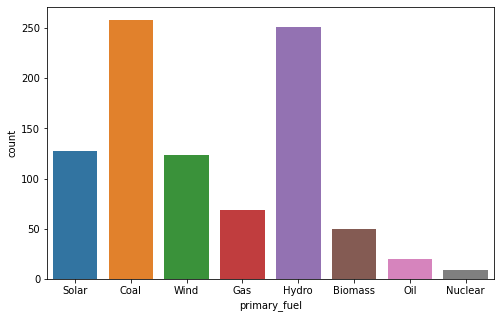

In [10]:
plt.figure(figsize = (8,5))
target = df.primary_fuel.value_counts()
print(target)
target = sns.countplot(df.primary_fuel)

### Observations of the target variable
- Primary fuel having different different variable and all are in imbalance count hence we need to fix it further for better performance model.

#### Checking Capactiy_mw

<AxesSubplot:ylabel='Density'>

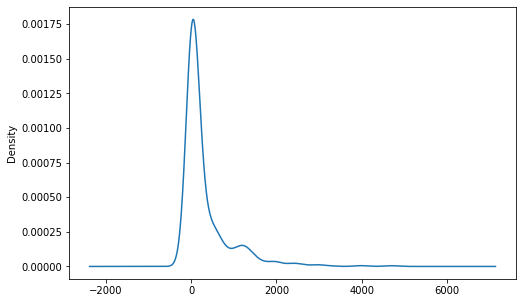

In [11]:
plt.figure(figsize = (8,5))
df.capacity_mw.plot(kind = 'kde')

### Observations of the target variable
- Capacity_mw are having a peak value in the range of approx 0.5 to 2000.

In [12]:
df.dtypes  # checking datatypes of the dataset

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

#### Observations: 
   - 'country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel','other_fuel1', 'other_fuel2', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source' are object type databases.
   - 'capacity_mw', 'latitude', 'longitude', 'other_fuel3',
       'commissioning_year', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'estimated_generation_gwh'are float type databases.


In [13]:
df.info()  # checking basic summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [14]:
df.describe()  # checking overall summary of the dataset

capacity_mw    latitude   longitude  other_fuel3  commissioning_year  \
count   907.000000  861.000000  861.000000          0.0          527.000000   
mean    326.223755   21.197918   77.464907          NaN         1997.091082   
std     590.085456    6.239612    4.939316          NaN           17.082868   
min       0.000000    8.168900   68.644700          NaN         1927.000000   
25%      16.725000   16.773900   74.256200          NaN         1988.000000   
50%      59.200000   21.780000   76.719500          NaN         2001.000000   
75%     385.250000   25.512400   79.440800          NaN         2012.000000   
max    4760.000000   34.649000   95.408000          NaN         2018.000000   

       wepp_id  year_of_capacity_data  generation_gwh_2013  \
count      0.0                  519.0                  0.0   
mean       NaN                 2019.0                  NaN   
std        NaN                    0.0                  NaN   
min        NaN                 2019.0                  NaN   
25%        NaN                 2019.0                  NaN   
50%        NaN                 2019.0                  NaN   
75%        NaN                 2019.0                  NaN   
max        NaN                 2019.0                  NaN   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           398.000000           422.000000           434.000000   
mean           2431.823590          2428.226946          2467.936859   
std            4026.440035          4194.596959          4162.884308   
min               0.000000             0.000000             0.000000   
25%             223.557672           176.381063           188.285252   
50%             801.123775           711.181225           737.205450   
75%            3035.306250          3084.121250          3282.861313   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
count           440.000000           448.000000                  0.0   
mean           2547.759305          2600.804099                  NaN   
std            4196.991169          4314.880456                  NaN   
min               0.000000             0.000000                  NaN   
25%             177.874930           193.378250                  NaN   
50%             817.977250           751.644375                  NaN   
75%            3275.690475          3143.535900                  NaN   
max           35116.000000         35136.000000                  NaN   

       estimated_generation_gwh  
count                       0.0  
mean                        NaN  
std                         NaN  
min                         NaN  
25%                         NaN  
50%                         NaN  
75%                         NaN  
max                         NaN

In [15]:
df.describe(include = 'all')  # checking overall statiscal summary of the dataset

country country_long              name   gppd_idnr  capacity_mw  \
count      907          907               907         907   907.000000   
unique       1            1               907         907          NaN   
top        IND        India  ACME Solar Tower  WRI1020239          NaN   
freq       907          907                 1           1          NaN   
mean       NaN          NaN               NaN         NaN   326.223755   
std        NaN          NaN               NaN         NaN   590.085456   
min        NaN          NaN               NaN         NaN     0.000000   
25%        NaN          NaN               NaN         NaN    16.725000   
50%        NaN          NaN               NaN         NaN    59.200000   
75%        NaN          NaN               NaN         NaN   385.250000   
max        NaN          NaN               NaN         NaN  4760.000000   

          latitude   longitude primary_fuel other_fuel1 other_fuel2  \
count   861.000000  861.000000          907         198           1   
unique         NaN         NaN            8           3           1   
top            NaN         NaN         Coal         Oil         Oil   
freq           NaN         NaN          258         195           1   
mean     21.197918   77.464907          NaN         NaN         NaN   
std       6.239612    4.939316          NaN         NaN         NaN   
min       8.168900   68.644700          NaN         NaN         NaN   
25%      16.773900   74.256200          NaN         NaN         NaN   
50%      21.780000   76.719500          NaN         NaN         NaN   
75%      25.512400   79.440800          NaN         NaN         NaN   
max      34.649000   95.408000          NaN         NaN         NaN   

        other_fuel3  commissioning_year        owner  \
count           0.0          527.000000          342   
unique          NaN                 NaN          280   
top             NaN                 NaN  Acc Acc ltd   
freq            NaN                 NaN            4   
mean            NaN         1997.091082          NaN   
std             NaN           17.082868          NaN   
min             NaN         1927.000000          NaN   
25%             NaN         1988.000000          NaN   
50%             NaN         2001.000000          NaN   
75%             NaN         2012.000000          NaN   
max             NaN         2018.000000          NaN   

                               source                     url  \
count                             907                     907   
unique                            191                     304   
top     Central Electricity Authority  http://www.cea.nic.in/   
freq                              519                     519   
mean                              NaN                     NaN   
std                               NaN                     NaN   
min                               NaN                     NaN   
25%                               NaN                     NaN   
50%                               NaN                     NaN   
75%                               NaN                     NaN   
max                               NaN                     NaN   

       geolocation_source  wepp_id  year_of_capacity_data  \
count                 888      0.0                  519.0   
unique                  3      NaN                    NaN   
top                   WRI      NaN                    NaN   
freq                  765      NaN                    NaN   
mean                  NaN      NaN                 2019.0   
std                   NaN      NaN                    0.0   
min                   NaN      NaN                 2019.0   
25%                   NaN      NaN                 2019.0   
50%                   NaN      NaN                 2019.0   
75%                   NaN      NaN                 2019.0   
max                   NaN      NaN                 2019.0   

        generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
count

<AxesSubplot:>

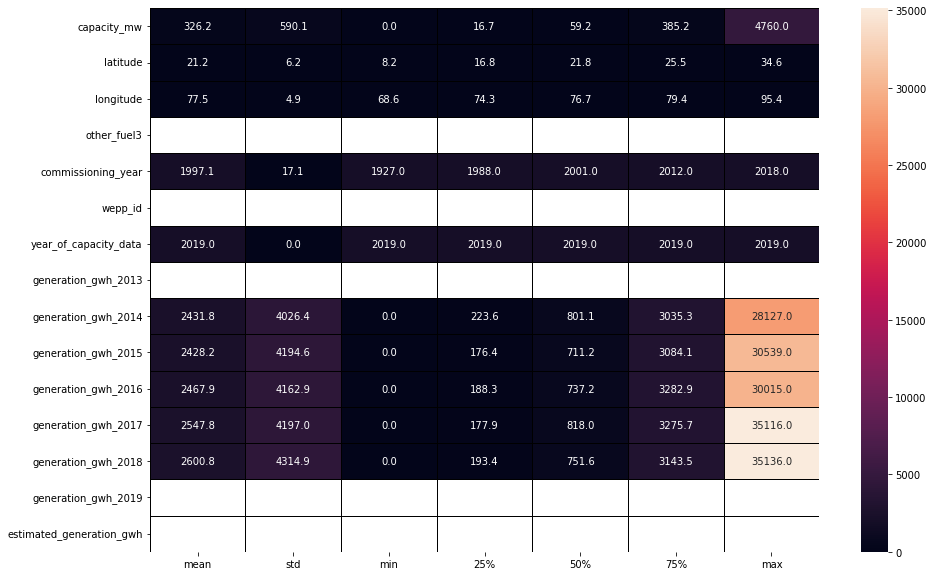

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(df.describe()[1:].transpose(), linewidths = 1, linecolor = 'black', annot = True, fmt = '.1f' )

#### Observations:- Capacity_mw, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016,generation_gwh_2017, generation_gwh_2018 probably having outliers because there max values very much higher than overall dataset.

### Checking Null Values of the Dataset`

In [17]:
df.isnull().sum()/len(df)*100  # in percentage

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.071665
longitude                     5.071665
primary_fuel                  0.000000
other_fuel1                  78.169791
other_fuel2                  99.889746
other_fuel3                 100.000000
commissioning_year           41.896362
owner                        62.293275
source                        0.000000
url                           0.000000
geolocation_source            2.094818
wepp_id                     100.000000
year_of_capacity_data        42.778390
generation_gwh_2013         100.000000
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_gwh_2019         100.000000
generation_data_source   

#### From above code we find that most of the columns having null values present as per above details.

<AxesSubplot:>

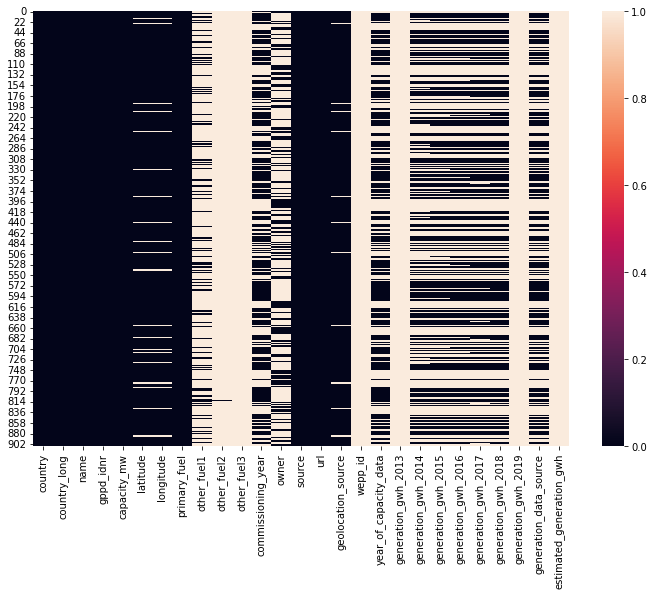

In [18]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull())

In [19]:
# checking null values 
null_columns = []
for i in df.columns:
    if df[i].isnull().sum()/len(df[i])*100>0:
        null_columns.append(i)

In [20]:
null_columns

['latitude',
 'longitude',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

#### Observations: 
'latitude', 'longitude', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'commissioning_year',
 'owner', 'geolocation_source', 'wepp_id', 'year_of_capacity_data','generation_gwh_2013','generation_gwh_2014',
 'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019',
 'generation_data_source','estimated_generation_gwh' these columns of dataset having null values.


## Exploratory Data Analysis

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

### Checking Duplicates Values¶

#### Checking Duplicates counts

In [22]:
df.duplicated().sum() # duplicate values counts of the dataset 

0

#### From above code we find that dataset does't having any duplicate values.

### Checking unique values counts of the dataset

In [23]:
for i in df.columns:
    print(i,'\n' ,df[i].unique().shape)  # checking unique values counts

country 
 (1,)
country_long 
 (1,)
name 
 (907,)
gppd_idnr 
 (907,)
capacity_mw 
 (361,)
latitude 
 (837,)
longitude 
 (828,)
primary_fuel 
 (8,)
other_fuel1 
 (4,)
other_fuel2 
 (2,)
other_fuel3 
 (1,)
commissioning_year 
 (74,)
owner 
 (281,)
source 
 (191,)
url 
 (304,)
geolocation_source 
 (4,)
wepp_id 
 (1,)
year_of_capacity_data 
 (2,)
generation_gwh_2013 
 (1,)
generation_gwh_2014 
 (372,)
generation_gwh_2015 
 (397,)
generation_gwh_2016 
 (404,)
generation_gwh_2017 
 (409,)
generation_gwh_2018 
 (411,)
generation_gwh_2019 
 (1,)
generation_data_source 
 (2,)
estimated_generation_gwh 
 (1,)


### Dealing with Null values

In [24]:
# checking null values with more than 50 percent
null_columns = []
for i in df.columns:
    if df[i].isnull().sum()/len(df[i])*100>50:
        null_columns.append(i)

In [25]:
null_columns # columns with more than 50 percent of null values

['other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'owner',
 'wepp_id',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

### Observations: 
   - Above columns dataset having more than **50 percent of null values**. If we are going to fill these null values with mean, mode, median, bfill, etc it **make model biased and result of any target variable will be single sided**.
   - Hence we need to drop these columns.
    

In [26]:
df.drop(null_columns, inplace = True, axis = 1)

In [27]:
df.head(2) # checking dataset columns after dropping 

country country_long                 name   gppd_idnr  capacity_mw  \
0     IND        India     ACME Solar Tower  WRI1020239          2.5   
1     IND        India  ADITYA CEMENT WORKS  WRI1019881         98.0   

   latitude  longitude primary_fuel  commissioning_year  \
0   28.1839    73.2407        Solar              2011.0   
1   24.7663    74.6090         Coal                 NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   

                     geolocation_source  year_of_capacity_data  
0  National Renewable Energy Laboratory                    NaN  
1                                   WRI                    NaN

In [28]:
df.shape # checking shape of the dataset

(907, 13)

### Checking Null values 

In [29]:
df.isnull().sum()/len(df)*100  # in percentage

country                   0.000000
country_long              0.000000
name                      0.000000
gppd_idnr                 0.000000
capacity_mw               0.000000
latitude                  5.071665
longitude                 5.071665
primary_fuel              0.000000
commissioning_year       41.896362
source                    0.000000
url                       0.000000
geolocation_source        2.094818
year_of_capacity_data    42.778390
dtype: float64

In [30]:
df.dtypes

country                   object
country_long              object
name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
commissioning_year       float64
source                    object
url                       object
geolocation_source        object
year_of_capacity_data    float64
dtype: object

### Dealing Null values of **Latitude**

In [31]:
df_latitude_mean = df['latitude'].fillna(df['latitude'].mean())

In [32]:
df_latitude_median = df['latitude'].fillna(df['latitude'].median())

### Checking suitable imputation methods

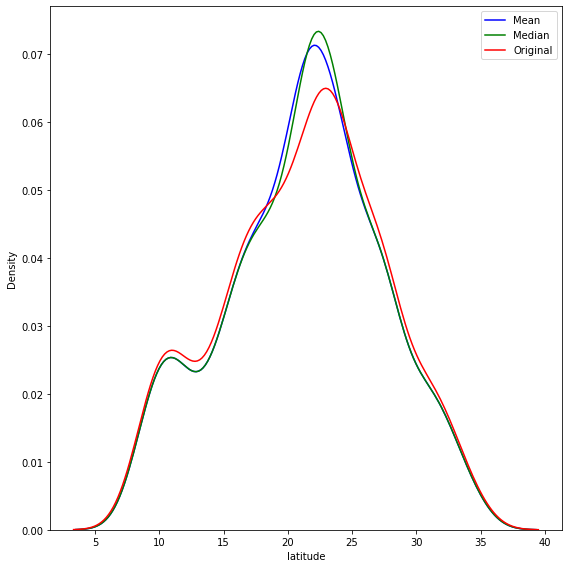

In [33]:
plt.figure(figsize = (8,8))
sns.distplot(df_latitude_mean, bins = 20, hist = False, color = 'b', label = 'mean' )
sns.distplot(df_latitude_median, bins = 20, hist = False, color = 'g', label = 'median')
sns.distplot(df['latitude'], bins = 20, hist = False, color = 'r', label = 'Original')
plt.legend(labels=['Mean','Median', 'Original'])
plt.tight_layout()

#### From above imputations we find that mean method shows closer result than median to the original database. 
- Hence we use mean imputation method to fill NaN values.

In [34]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())  #imputation done with mean
df['latitude'].isnull().sum()

0

#### 

### Dealing Null values of **Longitude**

In [35]:
df_longitude_mean = df['longitude'].fillna(df['longitude'].mean())

In [36]:
df_longitude_median = df['longitude'].fillna(df['longitude'].median())

### Checking suitable imputation methods

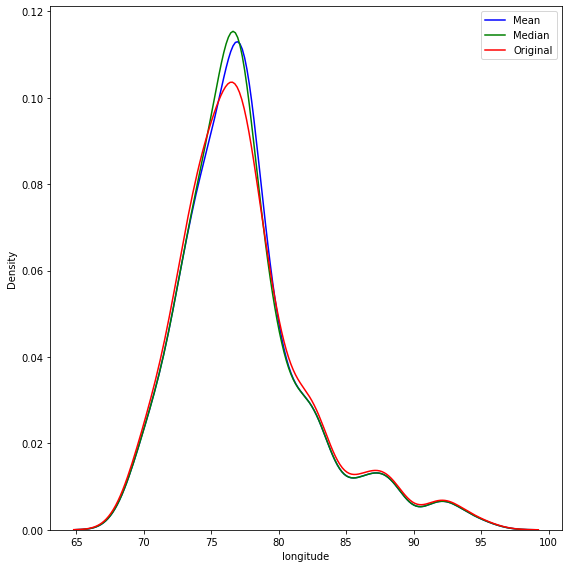

In [37]:
plt.figure(figsize = (8,8))
sns.distplot(df_longitude_mean, bins = 20, hist = False, color = 'b', label = 'mean' )
sns.distplot(df_longitude_median, bins = 20, hist = False, color = 'g', label = 'median')
sns.distplot(df['longitude'], bins = 20, hist = False, color = 'r', label = 'Original')
plt.legend(labels=['Mean','Median', 'Original'])
plt.tight_layout()

#### From above imputations we find that mean method shows closer result than median to the original database. 
- Hence we use mean imputation method to fill NaN values.

In [38]:
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())  #imputation done with mean
df['longitude'].isnull().sum()

0

### Dealing Null values of Commissioning_year

In [39]:
df['commissioning_year'].unique() # checking variable dataset

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [40]:
df['commissioning_year'].nunique() # checking unique variable count

73

In [41]:
df['commissioning_year'].astype('object').describe()  # checking most frequent year

count      527.0
unique      73.0
top       2015.0
freq        28.0
Name: commissioning_year, dtype: float64

#### From above observations we conclude that filling NaN values are suitable by mode method

In [42]:
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])

In [43]:
df['commissioning_year'].isnull().sum()  # checking null value after filling Nan

0

#### 

### Dealing Null values of Geolocation_source

In [44]:
df['geolocation_source'].unique() # checking variable dataset

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [45]:
df['geolocation_source'].nunique() # checking unique variable count

3

In [46]:
df['geolocation_source'].describe()  # checking most frequent year

count     888
unique      3
top       WRI
freq      765
Name: geolocation_source, dtype: object

#### From above observations we conclude that filling NaN values are suitable by mode method

In [47]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [48]:
df['geolocation_source'].isnull().sum()  # checking null value after filling Nan

0

#### 

### Dealing Null values of Year_of_capacity_data

In [49]:
df['year_of_capacity_data'].unique() # checking variable dataset

array([  nan, 2019.])

In [50]:
df['year_of_capacity_data'].nunique() # checking unique variable count

1

In [51]:
df['year_of_capacity_data'].astype('object').describe()  # checking most frequent year

count      519.0
unique       1.0
top       2019.0
freq       519.0
Name: year_of_capacity_data, dtype: float64

#### From above observations we conclude that filling NaN values are suitable by mode method

In [52]:
df['year_of_capacity_data'] = df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0])

In [53]:
df['year_of_capacity_data'].isnull().sum()  # checking null value after filling Nan

0

### Check whole dataset Null Values

In [54]:
df.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
dtype: int64

<AxesSubplot:>

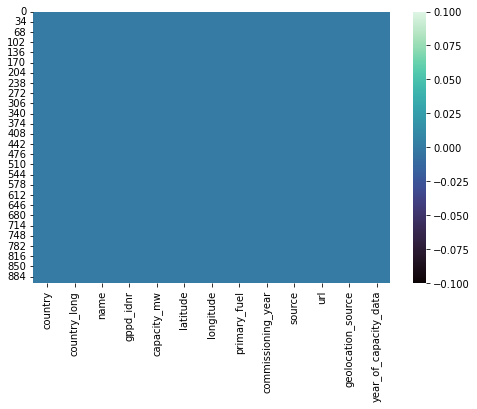

In [55]:
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cmap = 'mako')

#### 

### Checking unique values counts of the dataset after removing Null values

In [56]:
for i in df.columns:
    print(i,'\n' ,df[i].nunique())  # checking unique values counts

country 
 1
country_long 
 1
name 
 907
gppd_idnr 
 907
capacity_mw 
 361
latitude 
 837
longitude 
 828
primary_fuel 
 8
commissioning_year 
 73
source 
 191
url 
 304
geolocation_source 
 3
year_of_capacity_data 
 1


In [57]:
df.dtypes

country                   object
country_long              object
name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
commissioning_year       float64
source                    object
url                       object
geolocation_source        object
year_of_capacity_data    float64
dtype: object

In [58]:
df.shape

(907, 13)

In [59]:
df.sample(50) # checking all over dataset to know necessary variable details.

country country_long                            name   gppd_idnr  \
389     IND        India                         K_GUDEM  IND0000163   
470     IND        India                       MEJA STPP  IND0000532   
880     IND        India                 VINDH_CHAL STPS  IND0000503   
634     IND        India                        RAMGANGA  IND0000363   
743     IND        India                       SURATGARH  IND0000431   
186     IND        India                        DULHASTI  IND0000107   
324     IND        India                 KARCHAM WANGTOO  IND0000182   
538     IND        India          NIRGAJANI(Ganga Canal)  IND0000304   
179     IND        India                             DLF  IND0000103   
798     IND        India              TEESTA LOW DAM-III  IND0000448   
849     IND        India                        UNCHAHAR  IND0000479   
614     IND        India  Powerica Tirunelveli Wind Farm  WRI1026791   
52      IND        India                    BANSAGAR (I)  IND0000029   
692     IND        India                 SANKESHWAR MILL  WRI1019933   
469     IND        India                       MATATILLA  IND0000261   
546     IND        India                        NURANANG  IND0000309   
883     IND        India                       VIZAG TPP  IND0000506   
349     IND        India                    KODAYAR-I&II  IND0000200   
9       IND        India                     AMAR KANTAK  IND0000007   
522     IND        India                     NARIMANGLAM  IND0000291   
680     IND        India                           SAINJ  IND0000534   
507     IND        India                 Mokla Wind farm  WRI1026092   
744     IND        India                       SURULIYAR  IND0000432   
290     IND        India              JAYPEE BELA CEMENT  WRI1019999   
532     IND        India                   NEYVELI ST II  IND0000299   
712     IND        India                       SHIVAPURA  IND0000407   
731     IND        India                 SONE EAST CANAL  IND0000419   
494     IND        India                     MUNDRA UMPP  IND0000279   
754     IND        India      Sakri 1A Solar Power Plant  WRI1026202   
678     IND        India                  SAGARDIGHI TPP  IND0000385   
514     IND        India                    NAGDA GRASIM  WRI1020006   
393     IND        India       Kamuthi Solar Power Plant  WRI1026151   
116     IND        India     Bap - OPG Solar Power Plant  WRI1026117   
130     IND        India         Bitta Solar Power Plant  WRI1026125   
280     IND        India               INDRA GANDHI STPP  IND0000154   
247     IND        India        Gondri Solar Power Plant  WRI1026142   
376     IND        India                          KULHAL  IND0000218   
817     IND        India                     TROMBAY_Oil  IND0000465   
320     IND        India                          KANHER  IND0000179   
622     IND        India           RAGHUNATHPUR TPP PH-I  IND0000355   
66      IND        India                           BASSI  IND0000042   
390     IND        India                     K_GUDEM NEW  IND0000164   
573     IND        India                       PAPANASAM  IND0000324   
636     IND        India                          RAMMAM  IND0000365   
803     IND        India              THAMMINAPATNAM TPP  IND0000453   
521     IND        India                      NARAYANPUR  IND0000289   
256     IND        India                     HASDEOBANGO  IND0000141   
868     IND        India                     VALUTHUR GT  IND0000496   
283     IND        India       Isanpur Solar Power Plant  WRI1026147   
411     IND        India                  Kosa Wind Farm  WRI1026086   

     capacity_mw   latitude  longitude primary_fuel  commissioning_year  \
389        720.0  17.621900  80.693600         Coal              1972.0   
470        660.0  25.144700  81.941500         Coal              2018.0   
880       4760.0  24.098300  82.671900         Coal              2002.0   
634        198.0  29.516900  78

#### From above all information we find that:-
-  **country and country_long** are giving same information from the dataset and there values are not provide any details/information for prediction of model. Hence we can drop these columns for better model predictions.

- **name column** is providing values which are global power plant name and we know that any name of global plant are not informative for predictions. Hence we can drop it for better model predictions.

- **gppd_idnr column** is also a global power plant unique value codes to identify the global power plant for a easy recording purpose hence it is not providing any details regarding for predictions of model building. Hence we can drop it for better model predictions.

- **url** is the global power plant website address and thats all. It is not giving any information which is liable for model building and predictions. Hence we can drop it.

- **year_of_capacity_data** having a single value of year **2019** which is not much informative for a better predictions model building. Hence we can drop it for better model predictions.

In [60]:
df.drop(['country', 'country_long', 'name', 'gppd_idnr','url', 'year_of_capacity_data'], inplace = True, axis = 1)

In [61]:
df.head()

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   
1         98.0   24.7663    74.6090         Coal              2015.0   
2         39.2   21.9038    69.3732         Wind              2015.0   
3        135.0   23.8712    91.3602          Gas              2004.0   
4       1800.0   21.9603    82.4091         Coal              2015.0   

                                 source                    geolocation_source  
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory  
1                  Ultratech Cement ltd                                   WRI  
2                                   CDM                                   WRI  
3         Central Electricity Authority                                   WRI  
4         Central Electricity Authority                                   WRI

In [62]:
df.shape

(907, 7)

#### 

### After filling NaN values of the dataset Checking Duplicates counts again

In [63]:
df.duplicated().sum() # duplicate values counts of the dataset 

2

In [64]:
df[df.duplicated(subset = df.columns, keep = False)] # checking duplicated rows

capacity_mw   latitude  longitude primary_fuel  commissioning_year  \
222        77.65  31.268000  76.492000        Hydro              1957.0   
371        77.65  31.268000  76.492000        Hydro              1957.0   
655        22.50  21.197918  77.464907         Wind              2015.0   
674        22.50  21.197918  77.464907         Wind              2015.0   

                            source geolocation_source  
222  Central Electricity Authority                WRI  
371  Central Electricity Authority                WRI  
655                            CDM                WRI  
674                            CDM                WRI

In [65]:
df[df.duplicated()] # checking duplicated rows

capacity_mw   latitude  longitude primary_fuel  commissioning_year  \
371        77.65  31.268000  76.492000        Hydro              1957.0   
674        22.50  21.197918  77.464907         Wind              2015.0   

                            source geolocation_source  
371  Central Electricity Authority                WRI  
674                            CDM                WRI

### Dropping Duplicated Rows

In [66]:
df.drop_duplicates(inplace = True)   # dropping duplicate values for improved dataset 

In [67]:
df.shape  # checking new shape

(905, 7)

### Dividing columns into object and numerical categories for easy visualization understandings

In [68]:
df_object = df.select_dtypes(include = 'object').columns  # object dataset columns
df_num = df.select_dtypes(exclude = 'object').columns  # numerical dataset columns

In [69]:
df_object  # checking object columns

Index(['primary_fuel', 'source', 'geolocation_source'], dtype='object')

In [70]:
df_num  # checking non object columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year'], dtype='object')

### Checking unique values of the object dataset

In [71]:
for i in df_object:
    print(i,'\n' ,df[i].unique().shape)  # checking unique values counts

primary_fuel 
 (8,)
source 
 (191,)
geolocation_source 
 (3,)


In [72]:
for i in df_object:
    print(i,'\n' ,df[i].unique(), "\n")  # checking unique values

primary_fuel 
 ['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear'] 

source 
 ['National Renewable Energy Laboratory' 'Ultratech Cement ltd' 'CDM'
 'Central Electricity Authority' 'Hindustan Pvt lt' 'Dr Ssk ltd'
 'Ashok Ssk ltd' 'Shree Sugars ltd' 'Navbharat' 'Meil.In/P' 'Lancosola'
 'Indian Power ltd' 'Ballarpur Industries ltd' 'Jk Cement ltd'
 'India Ltd icl)' 'Ideal Projects ltd' 'Ugar Works ltd'
 'Vishwanath Sugars ltd' 'Hothur Pvt ltd' 'Janki Corp ltd'
 'Mysore Mills ltd' 'Sunflag Co ltd' 'Varam Pvt ltd' 'Sangam Spinners ltd'
 'Bharat Refinery ltd' 'Binani Industries ltd' 'Indo Synthetics ltd'
 'Ambed K Sugar' 'AES Winfra' 'Sembcorp' 'Punj Lloyd' 'Hiraco India'
 'Moserbaer Solar' 'Lingandwi' 'LEPL' 'CleanEnerg teLeanenergy'
 'Adani Power Limite r Er' 'Madhav Group' 'Power Private edM/Pdf'
 'Acc Acc ltd' 'Birla Corp ltd' 'Hindustan Zinc ltd' 'Gupta Ltd gepl)'
 'Manikghar Cement co' 'Core Fuels ltd'
 'Maharashtra State Power Generation Co Ltd (MAHAGENCO)' 'Solar for Indi

In [73]:
for i in df_object:
    print("--------------"+i+"---------------------",'\n' ,df[i].value_counts(), "\n")  # checking unique counts

--------------primary_fuel--------------------- 
 Coal       258
Hydro      250
Solar      127
Wind       122
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64 

--------------source--------------------- 
 Central Electricity Authority                                  518
CDM                                                            123
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            4
Reliance Power Ltd                                               4
Rajasthan Renewable Energy Corporation Limited (RREC)            4
Jk Cement ltd                                                    4
Acc Acc ltd                                                      4
Jaypee Ltd jccl)                                                 3
Hindustan Zinc

### We are going to make prediction first for capacity_mw

## Univariate Analysis

#### Categorical Values

In [74]:
df_object

Index(['primary_fuel', 'source', 'geolocation_source'], dtype='object')

### Primary Fuel

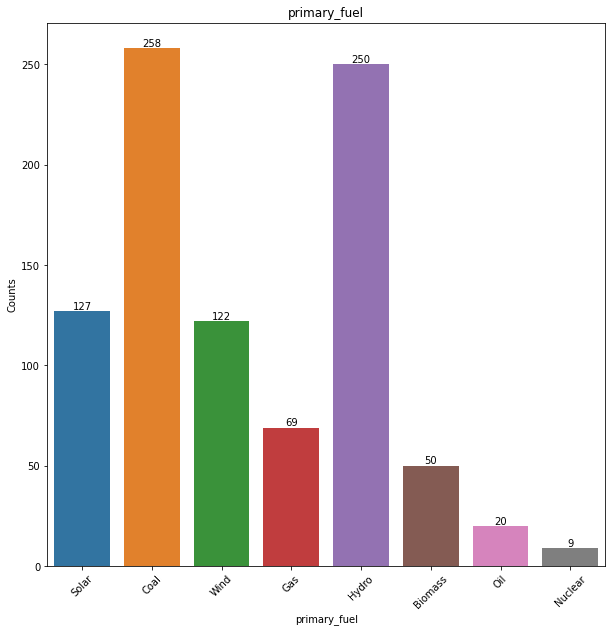

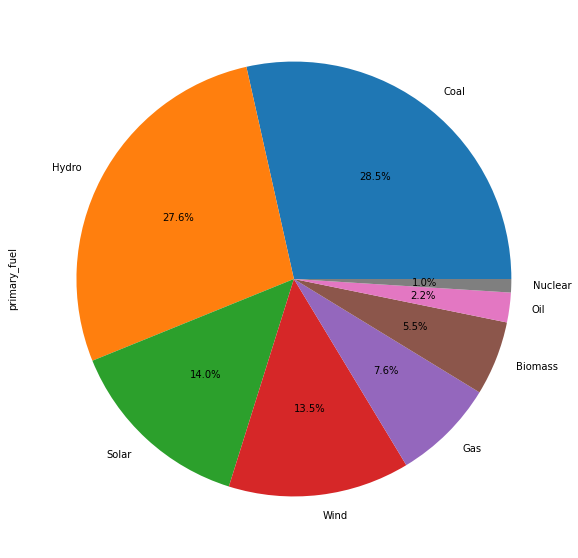

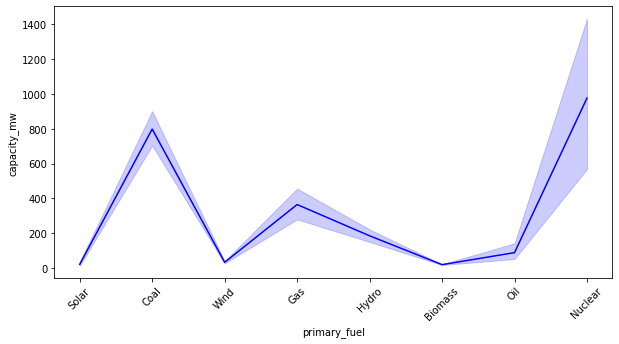

In [75]:
primary_fuel = df.primary_fuel.value_counts()
plt.figure(figsize = (10,10))
df_primary_fuel = sns.countplot(x='primary_fuel', data = df)
df_primary_fuel.set_title('primary_fuel')
df_primary_fuel.set_xlabel('primary_fuel')
df_primary_fuel.set_ylabel('Counts')
plt.xticks(rotation = 45)
for i in df_primary_fuel.containers:
    df_primary_fuel.bar_label(i)
    
# Percentage of Primary fuels
plt.figure(figsize = (10,10))
primary_fuel.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x = "primary_fuel", y = 'capacity_mw', data=df, color='blue')
plt.xticks(rotation = 45)
plt.show()

### Observations: 
    

In [76]:
# primary_fuel  Counts

# Coal           258
# Hydro          250
# Solar          127
# Wind           122
# Gas            69
# Biomass        50
# Oil            20
# Nuclear        9

#Coal plants are higher while Nuclear plant are only 9 rest global plants counts mentions as above

#### Pie Chart

In [77]:
# Primaryfuel Percentage
# Coal        28.508287
# Hydro       27.624309
# Solar       14.033149
# Wind        13.480663
# Gas          7.624309
# Biomass      5.524862
# Oil          2.209945
# Nuclear      0.994475

# # 28.508 percent plants are of coal as per above details while nuclear plant are in the 0.99 ratio.

#### Line Plot

#### Observations : 
- Capacity_mw are higher for coal and nuclear as per graph.

#### 

## Source

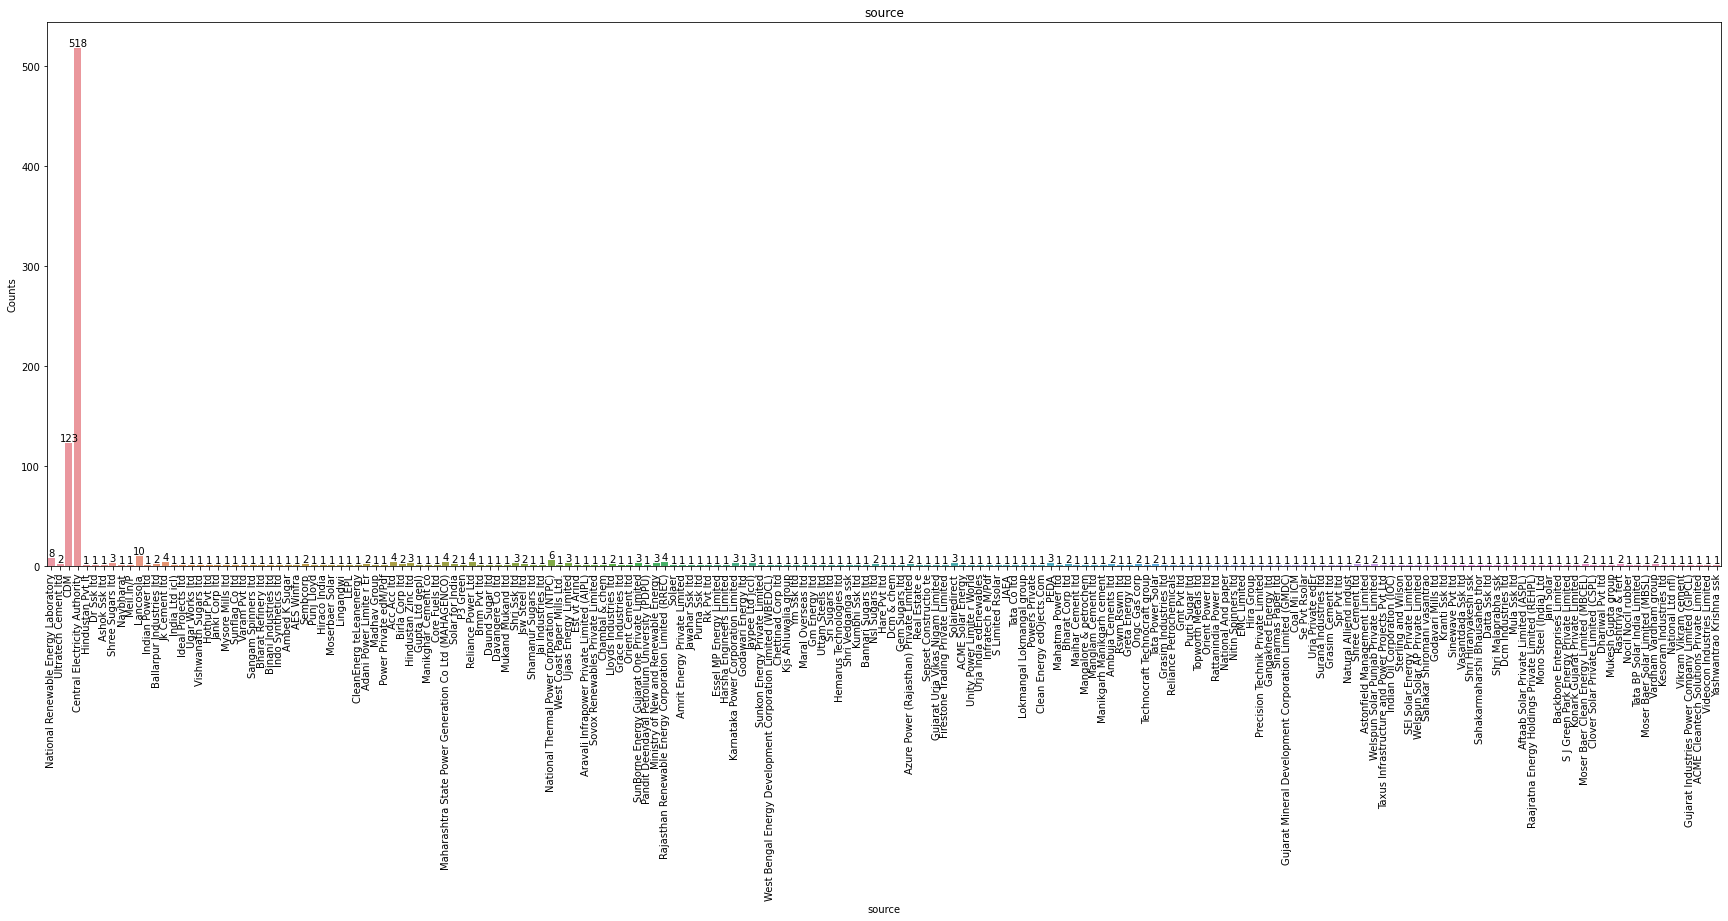

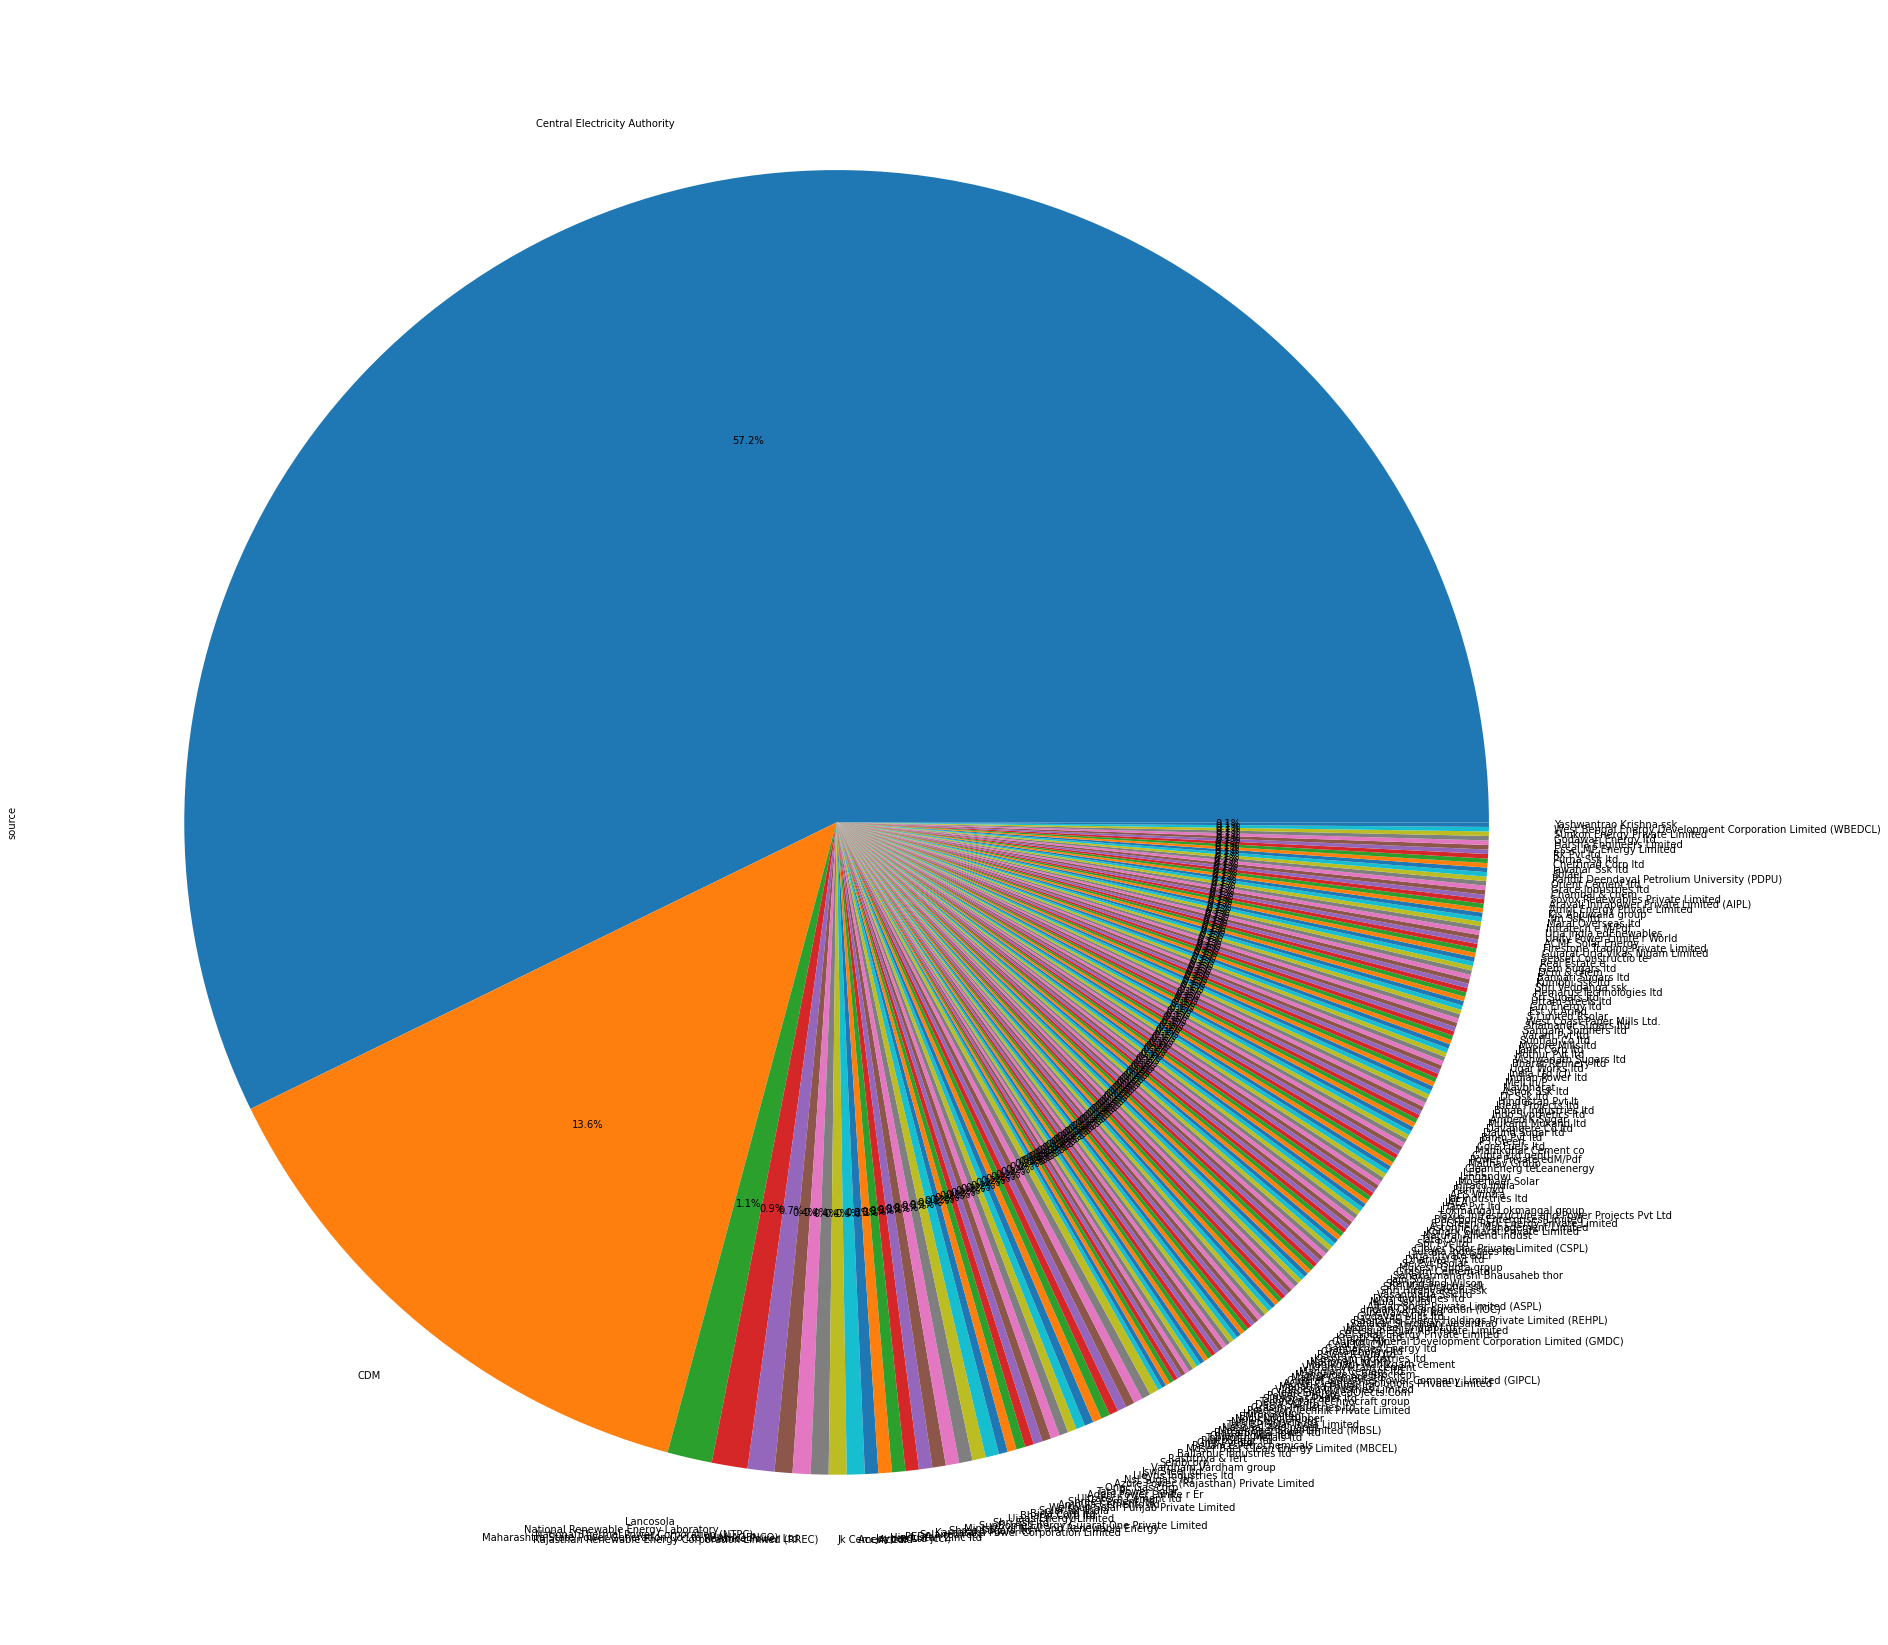

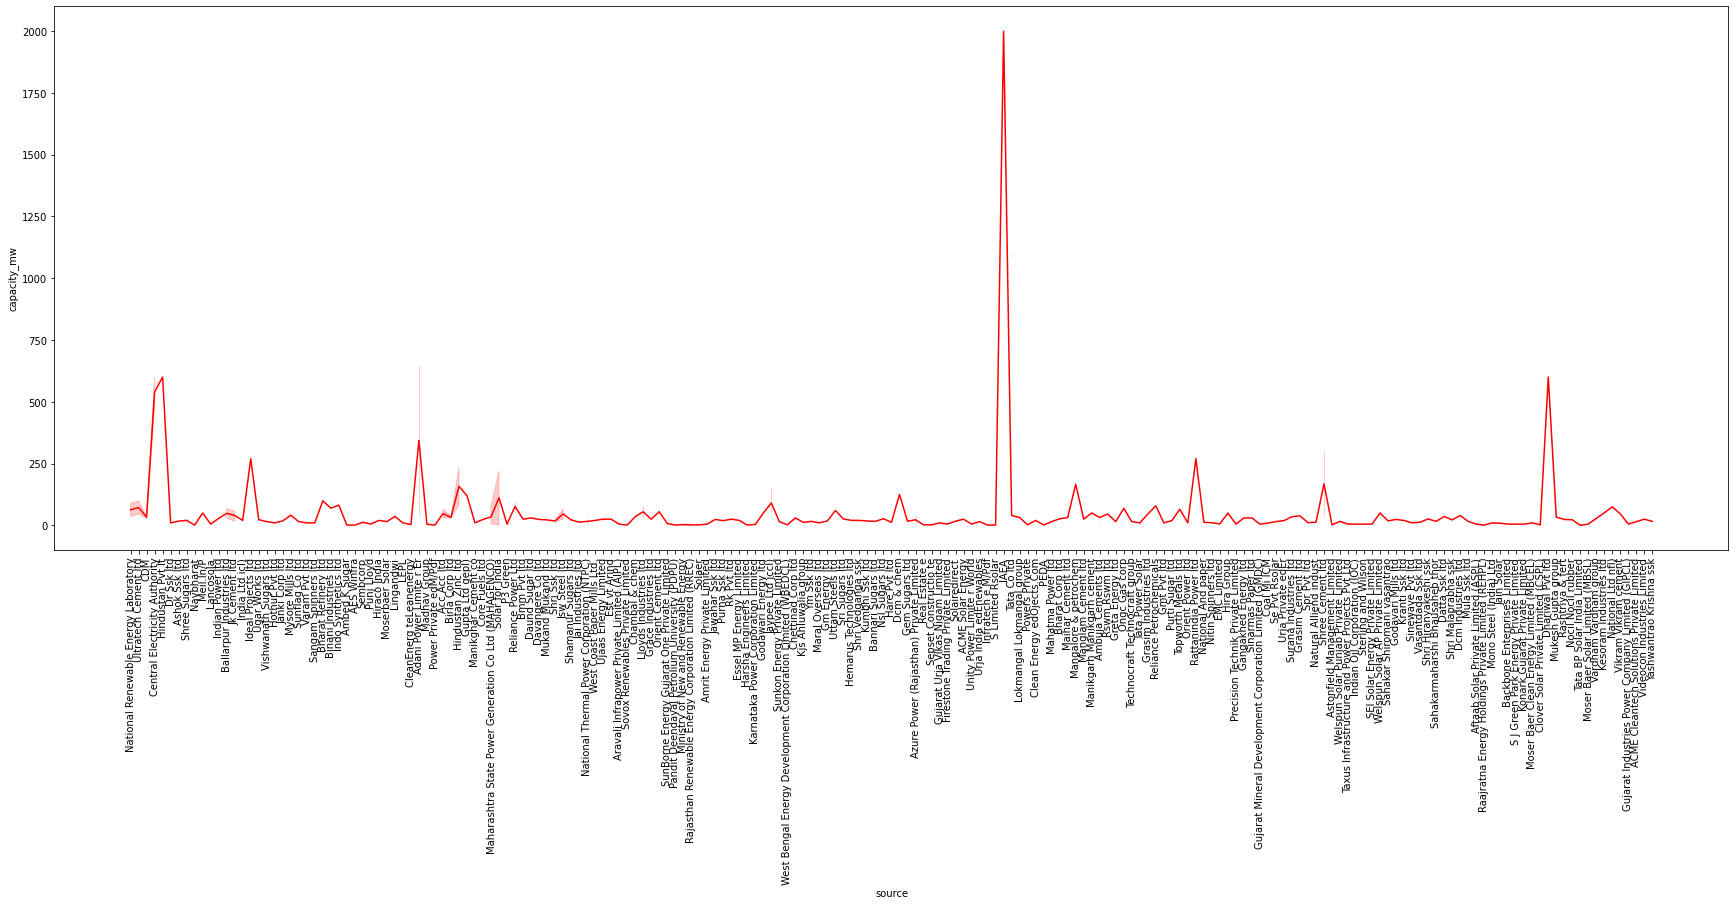

In [78]:
source = df.source.value_counts()
plt.figure(figsize = (30,10))
df_source = sns.countplot(x='source', data = df)
df_source.set_title('source')
df_source.set_xlabel('source')
df_source.set_ylabel('Counts')
plt.xticks(rotation = 90)
for i in df_source.containers:
    df_source.bar_label(i)
    
# Percentage of workclass
plt.figure(figsize = (30,30))
source.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(30,10))
sns.lineplot(x="source",y = 'capacity_mw', data=df, color='red')
plt.xticks(rotation = 90)
plt.show()

### Observations: -

In [79]:
# Source                                                        Counts
# Central Electricity Authority                                  518
# CDM                                                            123
# Lancosola                                                       10
# National Renewable Energy Laboratory                             8
# National Thermal Power Corporation (NTPC)                        6
# Maharashtra State Power Generation Co Ltd (MAHAGENCO)            4
# Reliance Power Ltd                                               4
# Rajasthan Renewable Energy Corporation Limited (RREC)            4
# Jk Cement ltd                                                    4
# Acc Acc ltd                                                      4
# Jaypee Ltd jccl)                                                 3
# Hindustan Zinc ltd                                               3
# PEDA                                                             3
# Solairedirect                                                    3
# Karnataka Power Corporation Limited                              3
# Shree Sugars ltd                                                 3
# Ministry of New and Renewable Energy                             3
# SunBorne Energy Gujarat One Private Limited                      3
# Shri Ssk ltd                                                     3
# Ujaas Energy Limited                                             3
# Bharat Corp ltd                                                  2
# Birla Corp ltd                                                   2
# Solar for India                                                  2
# Welspun Solar Punjab Private Limited                             2
# Ambuja Cements ltd                                               2
# Shree Cement ltd                                                 2
# Ultratech Cement ltd                                             2
# Adani Power Limite r Er                                          2
# Tata Power Solar                                                 2
# Ongc Gas corp                                                    2
# Azure Power (Rajasthan) Private Limited                          2
# Nsl Sugars ltd                                                   2
# Lloyds Industries ltd                                            2
# Jsw Steel ltd                                                    2
# Vardham Vardham group                                            2
# Sembcorp                                                         2
# Rashtriya & fert                                                 2
# Ballarpur Industries ltd                                         2
# Moser Baer Clean Energy Limited (MBCEL)                          2
# Reliance Petrochemicals                                          1
# Gmt Pvt ltd                                                      1
# Purti Sugar ltd                                                  1
# Topworth Metals ltd                                              1
# Orient Power ltd                                                 1
# Rattanindia Power ltd                                            1
# Moser Baer Solar Limited (MBSL)                                  1
# National And paper                                               1
# Tata BP Solar India Limited                                      1
# Nitin Spinners ltd                                               1
# Nocil Nocil rubber                                               1
# EMC Limited                                                      1
# Hira Group                                                       1
# Precision Technik Private Limited                                1
# Grasim Industries ltd                                            1
# Datta Ssk ltd                                                    1
# Technocraft Technocraft group                                    1
# Sinarmas Paper ltd                                               1
# Powers Private                                                   1
# Clean Energy edOjects.Com                                        1
# Videocon Industries Limited                                      1
# Mahatma Power ltd                                                1
# ACME Cleantech Solutions Private Limited                         1
# Gujarat Industries Power Company Limited (GIPCL)                 1
# Maihar Cement ltd                                                1
# Mangalore & petrochem                                            1
# Manglam Cement ltd                                               1
# Vikram Vikram cement                                             1
# Manikgarh Manikgarh cement                                       1
# National Ltd nfl)                                                1
# Kesoram Industries ltd                                           1
# Rswm Rswm ltd                                                    1
# Greta Energy ltd                                                 1
# Gangakhed Energy ltd                                             1
# Coal Mi ICM                                                      1
# Gujarat Mineral Development Corporation Limited (GMDC)           1
# Kranti Ssk ltd                                                   1
# SEI Solar Energy Private Limited                                 1
# Welspun Solar AP Private Limited                                 1
# Mono Steel (India) Ltd                                           1
# Sahakar Shiromani vasantrao                                      1
# Raajratna Energy Holdings Private Limited (REHPL)                1
# Godavari Mills ltd                                               1
# Sinewave Pvt ltd                                                 1
# Indian Oil Corporation (IOC)                                     1
# Aftaab Solar Private Limited (ASPL)                              1
# Mula Ssk ltd                                                     1
# Dcm Industries ltd                                               1
# Vasantdada Ssk ltd                                               1
# Shri Hiranyakeshi ssk                                            1
# Shri Malaprabha ssk                                              1
# Sterling and Wilson                                              1
# Jain Solar                                                       1
# Sahakarmaharshi Bhausaheb thor                                   1
# Grasim Cement ltd                                                1
# Mukesh Gupta group                                               1
# Se Pvt Rsolar                                                    1
# Dhariwal Pvt ltd                                                 1
# Urja Private edEr                                                1
# Surana Industries ltd                                            1
# Clover Solar Private Limited (CSPL)                              1
# Spr Pvt ltd                                                      1
# Tata Co ltd                                                      1
# Natural Alliend indust                                           1
# Konark Gujarat Private Limited                                   1
# Astonfield Management Limited                                    1
# S J Green Park Energy Private Limited                            1
# Backbone Enterprises Limited                                     1
# Taxus Infrastructure and Power Projects Pvt Ltd                  1
# Lokmangal Lokmangal group                                        1
# Hare Pvt ltd                                                     1
# IAEA                                                             1
# Jai Industries ltd                                               1
# AES Winfra                                                       1
# Punj Lloyd                                                       1
# Hiraco India                                                     1
# Moserbaer Solar                                                  1
# Lingandwi                                                        1
# LEPL                                                             1
# CleanEnerg teLeanenergy                                          1
# Madhav Group                                                     1
# Power Private edM/Pdf                                            1
# Gupta Ltd gepl)                                                  1
# Manikghar Cement co                                              1
# Core Fuels ltd                                                   1
# P3 Green                                                         1
# Bmm Pvt ltd                                                      1
# Daund Sugar ltd                                                  1
# Davangere Co ltd                                                 1
# Mukand Mukand ltd                                                1
# Ambed K Sugar                                                    1
# Indo Synthetics ltd                                              1
# Binani Industries ltd                                            1
# Ideal Projects ltd                                               1
# Hindustan Pvt lt                                                 1
# Dr Ssk ltd                                                       1
# Ashok Ssk ltd                                                    1
# Navbharat                                                        1
# Meil.In/P                                                        1
# Indian Power ltd                                                 1
# India Ltd icl)                                                   1
# Ugar Works ltd                                                   1
# Bharat Refinery ltd                                              1
# Vishwanath Sugars ltd                                            1
# Hothur Pvt ltd                                                   1
# Janki Corp ltd                                                   1
# Mysore Mills ltd                                                 1
# Sunflag Co ltd                                                   1
# Varam Pvt ltd                                                    1
# Sangam Spinners ltd                                              1
# Shamanur Sugars ltd                                              1
# West Coast Paper Mills Ltd.                                      1
# S Limited Rsolar                                                 1
# Est vt Arind                                                     1
# Gm Energy ltd                                                    1
# Uttam Steels ltd                                                 1
# Sri Sugars ltd                                                   1
# Hemarus Technologies ltd                                         1
# Shri Vedganga ssk                                                1
# Kumbhi Ssk ltd                                                   1
# Bannari Sugars ltd                                               1
# Dcm & chem                                                       1
# Gem Sugars ltd                                                   1
# Real Estate e                                                    1
# Sepset Constructio te                                            1
# Gujarat Urja Vikas Nigam Limited                                 1
# Firestone Trading Private Limited                                1
# ACME Solar Energy                                                1
# Unity Power Limite r World                                       1
# Urja India edEnewables                                           1
# Infratech e M/Pdf                                                1
# Maral Overseas ltd                                               1
# Ym Ssk ltd                                                       1
# Kjs Ahluwalia group                                              1
# Amrit Energy Private Limited                                     1
# Aravali Infrapower Private Limited (AIPL)                        1
# Sovox Renewables Private Limited                                 1
# Chambal & chem                                                   1
# Grace Industries ltd                                             1
# Orient Cement ltd                                                1
# Pandit Deendayal Petrolium University (PDPU)                     1
# Solaer                                                           1
# Jawahar Ssk ltd                                                  1
# Chettinad Corp ltd                                               1
# Purna Ssk ltd                                                    1
# Rk Pvt ltd                                                       1
# Essel MP Energy Limited                                          1
# Harsha Engineers Limited                                         1
# Godawari Energy ltd                                              1
# Sunkon Energy Private Limited                                    1
# West Bengal Energy Development Corporation Limited (WBEDCL)      1
# Yashwantrao Krishna ssk                                          1


#### 
- Central Electricity Authority sourch are very high in number and produce higher source to global power plants as per dataset.

#### Pie Chart

In [80]:
# Source                                                         Percentage
# Central Electricity Authority                                  57.237569
# CDM                                                            13.591160
# Lancosola                                                       1.104972
# National Renewable Energy Laboratory                            0.883978
# National Thermal Power Corporation (NTPC)                       0.662983
# Maharashtra State Power Generation Co Ltd (MAHAGENCO)           0.441989
# Reliance Power Ltd                                              0.441989
# Rajasthan Renewable Energy Corporation Limited (RREC)           0.441989
# Jk Cement ltd                                                   0.441989
# Acc Acc ltd                                                     0.441989
# Jaypee Ltd jccl)                                                0.331492
# Hindustan Zinc ltd                                              0.331492
# PEDA                                                            0.331492
# Solairedirect                                                   0.331492
# Karnataka Power Corporation Limited                             0.331492
# Shree Sugars ltd                                                0.331492
# Ministry of New and Renewable Energy                            0.331492
# SunBorne Energy Gujarat One Private Limited                     0.331492
# Shri Ssk ltd                                                    0.331492
# Ujaas Energy Limited                                            0.331492
# Bharat Corp ltd                                                 0.220994
# Birla Corp ltd                                                  0.220994
# Solar for India                                                 0.220994
# Welspun Solar Punjab Private Limited                            0.220994
# Ambuja Cements ltd                                              0.220994
# Shree Cement ltd                                                0.220994
# Ultratech Cement ltd                                            0.220994
# Adani Power Limite r Er                                         0.220994
# Tata Power Solar                                                0.220994
# Ongc Gas corp                                                   0.220994
# Azure Power (Rajasthan) Private Limited                         0.220994
# Nsl Sugars ltd                                                  0.220994
# Lloyds Industries ltd                                           0.220994
# Jsw Steel ltd                                                   0.220994
# Vardham Vardham group                                           0.220994
# Sembcorp                                                        0.220994
# Rashtriya & fert                                                0.220994
# Ballarpur Industries ltd                                        0.220994
# Moser Baer Clean Energy Limited (MBCEL)                         0.220994
# Reliance Petrochemicals                                         0.110497
# Gmt Pvt ltd                                                     0.110497
# Purti Sugar ltd                                                 0.110497
# Topworth Metals ltd                                             0.110497
# Orient Power ltd                                                0.110497
# Rattanindia Power ltd                                           0.110497
# Moser Baer Solar Limited (MBSL)                                 0.110497
# National And paper                                              0.110497
# Tata BP Solar India Limited                                     0.110497
# Nitin Spinners ltd                                              0.110497
# Nocil Nocil rubber                                              0.110497
# EMC Limited                                                     0.110497
# Hira Group                                                      0.110497
# Precision Technik Private Limited                               0.110497
# Grasim Industries ltd                                           0.110497
# Datta Ssk ltd                                                   0.110497
# Technocraft Technocraft group                                   0.110497
# Sinarmas Paper ltd                                              0.110497
# Powers Private                                                  0.110497
# Clean Energy edOjects.Com                                       0.110497
# Videocon Industries Limited                                     0.110497
# Mahatma Power ltd                                               0.110497
# ACME Cleantech Solutions Private Limited                        0.110497
# Gujarat Industries Power Company Limited (GIPCL)                0.110497
# Maihar Cement ltd                                               0.110497
# Mangalore & petrochem                                           0.110497
# Manglam Cement ltd                                              0.110497
# Vikram Vikram cement                                            0.110497
# Manikgarh Manikgarh cement                                      0.110497
# National Ltd nfl)                                               0.110497
# Kesoram Industries ltd                                          0.110497
# Rswm Rswm ltd                                                   0.110497
# Greta Energy ltd                                                0.110497
# Gangakhed Energy ltd                                            0.110497
# Coal Mi ICM                                                     0.110497
# Gujarat Mineral Development Corporation Limited (GMDC)          0.110497
# Kranti Ssk ltd                                                  0.110497
# SEI Solar Energy Private Limited                                0.110497
# Welspun Solar AP Private Limited                                0.110497
# Mono Steel (India) Ltd                                          0.110497
# Sahakar Shiromani vasantrao                                     0.110497
# Raajratna Energy Holdings Private Limited (REHPL)               0.110497
# Godavari Mills ltd                                              0.110497
# Sinewave Pvt ltd                                                0.110497
# Indian Oil Corporation (IOC)                                    0.110497
# Aftaab Solar Private Limited (ASPL)                             0.110497
# Mula Ssk ltd                                                    0.110497
# Dcm Industries ltd                                              0.110497
# Vasantdada Ssk ltd                                              0.110497
# Shri Hiranyakeshi ssk                                           0.110497
# Shri Malaprabha ssk                                             0.110497
# Sterling and Wilson                                             0.110497
# Jain Solar                                                      0.110497
# Sahakarmaharshi Bhausaheb thor                                  0.110497
# Grasim Cement ltd                                               0.110497
# Mukesh Gupta group                                              0.110497
# Se Pvt Rsolar                                                   0.110497
# Dhariwal Pvt ltd                                                0.110497
# Urja Private edEr                                               0.110497
# Surana Industries ltd                                           0.110497
# Clover Solar Private Limited (CSPL)                             0.110497
# Spr Pvt ltd                                                     0.110497
# Tata Co ltd                                                     0.110497
# Natural Alliend indust                                          0.110497
# Konark Gujarat Private Limited                                  0.110497
# Astonfield Management Limited                                   0.110497
# S J Green Park Energy Private Limited                           0.110497
# Backbone Enterprises Limited                                    0.110497
# Taxus Infrastructure and Power Projects Pvt Ltd                 0.110497
# Lokmangal Lokmangal group                                       0.110497
# Hare Pvt ltd                                                    0.110497
# IAEA                                                            0.110497
# Jai Industries ltd                                              0.110497
# AES Winfra                                                      0.110497
# Punj Lloyd                                                      0.110497
# Hiraco India                                                    0.110497
# Moserbaer Solar                                                 0.110497
# Lingandwi                                                       0.110497
# LEPL                                                            0.110497
# CleanEnerg teLeanenergy                                         0.110497
# Madhav Group                                                    0.110497
# Power Private edM/Pdf                                           0.110497
# Gupta Ltd gepl)                                                 0.110497
# Manikghar Cement co                                             0.110497
# Core Fuels ltd                                                  0.110497
# P3 Green                                                        0.110497
# Bmm Pvt ltd                                                     0.110497
# Daund Sugar ltd                                                 0.110497
# Davangere Co ltd                                                0.110497
# Mukand Mukand ltd                                               0.110497
# Ambed K Sugar                                                   0.110497
# Indo Synthetics ltd                                             0.110497
# Binani Industries ltd                                           0.110497
# Ideal Projects ltd                                              0.110497
# Hindustan Pvt lt                                                0.110497
# Dr Ssk ltd                                                      0.110497
# Ashok Ssk ltd                                                   0.110497
# Navbharat                                                       0.110497
# Meil.In/P                                                       0.110497
# Indian Power ltd                                                0.110497
# India Ltd icl)                                                  0.110497
# Ugar Works ltd                                                  0.110497
# Bharat Refinery ltd                                             0.110497
# Vishwanath Sugars ltd                                           0.110497
# Hothur Pvt ltd                                                  0.110497
# Janki Corp ltd                                                  0.110497
# Mysore Mills ltd                                                0.110497
# Sunflag Co ltd                                                  0.110497
# Varam Pvt ltd                                                   0.110497
# Sangam Spinners ltd                                             0.110497
# Shamanur Sugars ltd                                             0.110497
# West Coast Paper Mills Ltd.                                     0.110497
# S Limited Rsolar                                                0.110497
# Est vt Arind                                                    0.110497
# Gm Energy ltd                                                   0.110497
# Uttam Steels ltd                                                0.110497
# Sri Sugars ltd                                                  0.110497
# Hemarus Technologies ltd                                        0.110497
# Shri Vedganga ssk                                               0.110497
# Kumbhi Ssk ltd                                                  0.110497
# Bannari Sugars ltd                                              0.110497
# Dcm & chem                                                      0.110497
# Gem Sugars ltd                                                  0.110497
# Real Estate e                                                   0.110497
# Sepset Constructio te                                           0.110497
# Gujarat Urja Vikas Nigam Limited                                0.110497
# Firestone Trading Private Limited                               0.110497
# ACME Solar Energy                                               0.110497
# Unity Power Limite r World                                      0.110497
# Urja India edEnewables                                          0.110497
# Infratech e M/Pdf                                               0.110497
# Maral Overseas ltd                                              0.110497
# Ym Ssk ltd                                                      0.110497
# Kjs Ahluwalia group                                             0.110497
# Amrit Energy Private Limited                                    0.110497
# Aravali Infrapower Private Limited (AIPL)                       0.110497
# Sovox Renewables Private Limited                                0.110497
# Chambal & chem                                                  0.110497
# Grace Industries ltd                                            0.110497
# Orient Cement ltd                                               0.110497
# Pandit Deendayal Petrolium University (PDPU)                    0.110497
# Solaer                                                          0.110497
# Jawahar Ssk ltd                                                 0.110497
# Chettinad Corp ltd                                              0.110497
# Purna Ssk ltd                                                   0.110497
# Rk Pvt ltd                                                      0.110497
# Essel MP Energy Limited                                         0.110497
# Harsha Engineers Limited                                        0.110497
# Godawari Energy ltd                                             0.110497
# Sunkon Energy Private Limited                                   0.110497
# West Bengal Energy Development Corporation Limited (WBEDCL)     0.110497
# Yashwantrao Krishna ssk                                         0.110497

#### 
- More than 50 percent of source is of Central Electricity Authority which contribute to the global plants.
- And very less amount of source provide by others as per above percentage details.  

#### Line Plot

####  Observations: -
- **IAEA, Dharwal Pvt Ltd and Central Electricity Authority** produce higher capacity_mv than others as per above line plot.

#### 

## geolocation_source

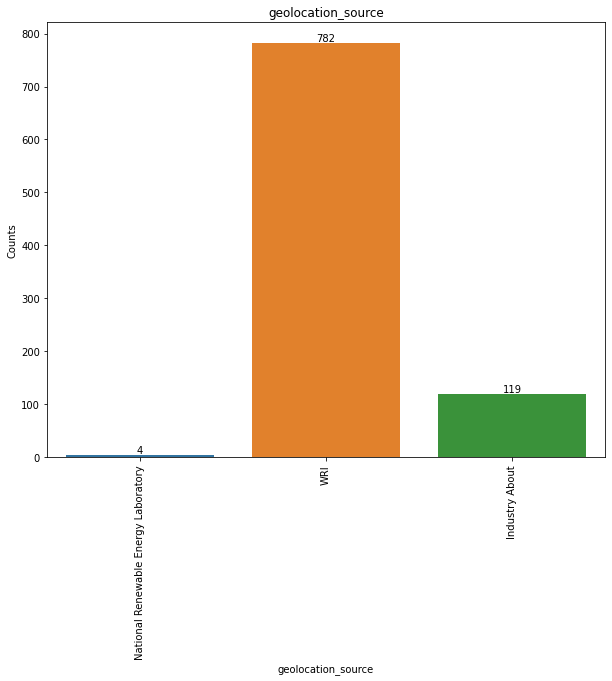

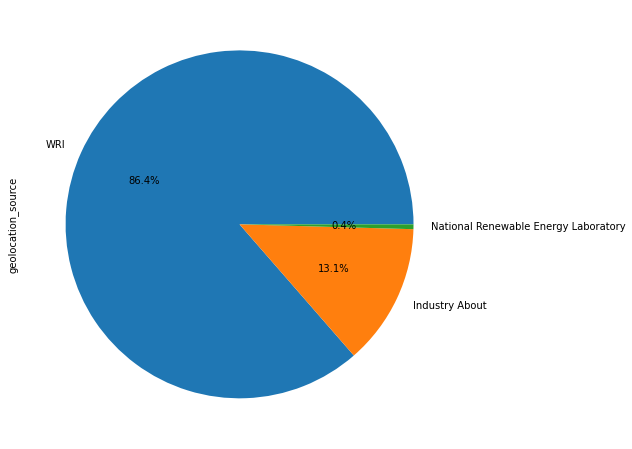

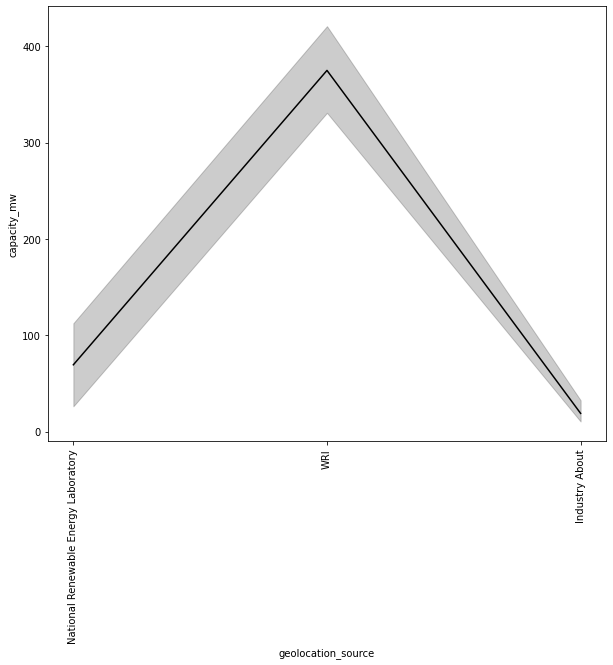

In [81]:
geolocation_source = df.geolocation_source.value_counts()
plt.figure(figsize = (10,8))
df_geolocation_source = sns.countplot(x='geolocation_source', data = df)
df_geolocation_source.set_title('geolocation_source')
df_geolocation_source.set_xlabel('geolocation_source')
df_geolocation_source.set_ylabel('Counts')
plt.xticks(rotation = 90)
for i in df_geolocation_source.containers:
    df_geolocation_source.bar_label(i)
    
# Percentage of workclass
plt.figure(figsize = (10,8))
geolocation_source.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,8))
sns.lineplot(x="geolocation_source",y="capacity_mw",data=df, color='black')
plt.xticks(rotation = 90)
plt.show()

### Observations:- 

In [82]:
# geolocation_source                     Counts
# WRI                                     782
# Industry About                          119
# National Renewable Energy Laboratory      4

 - As per graph WRI gives very high contribution towards the global power plant as per above mention details.

#### Pie Chart

In [83]:
# geolocation_source                     Percentage
# WRI                                     86.408840
# Industry About                          13.149171
# National Renewable Energy Laboratory     0.441989

- Most of the global power plant having WRI geolocation_soure with ratio of 86.40 as per above pie chart.

#### Line Plot

- Very large capacity_mv produce by WRI as per line plot mention above while other geolocation source are very less.

#### 

### Primary fuel with respect to other numerical variables


 -------------------------------------latitude-------------------------------------


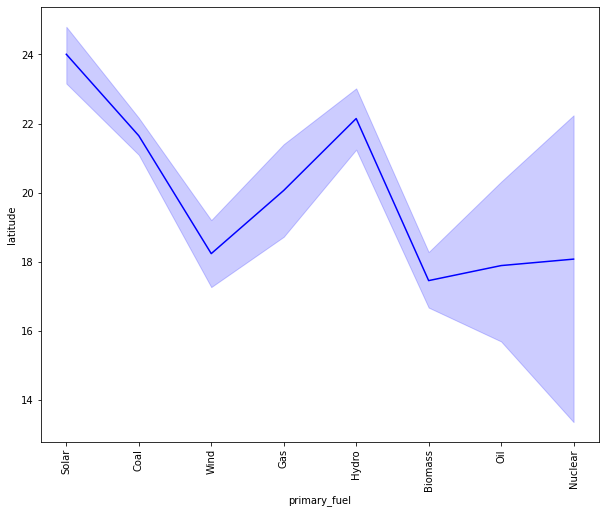


 -------------------------------------longitude-------------------------------------


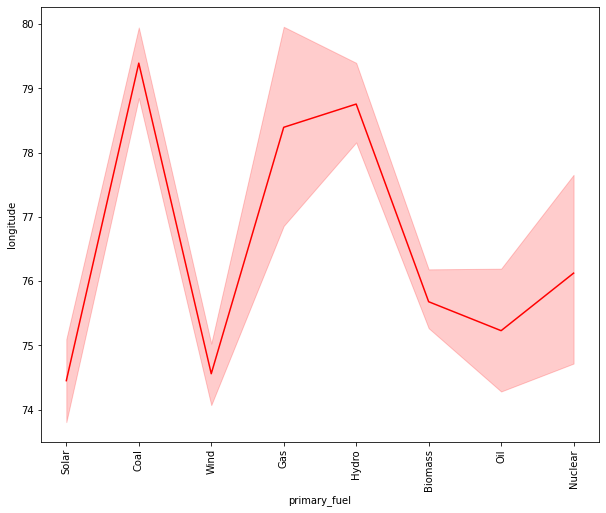


 -------------------------------------commissioning_year-------------------------------------


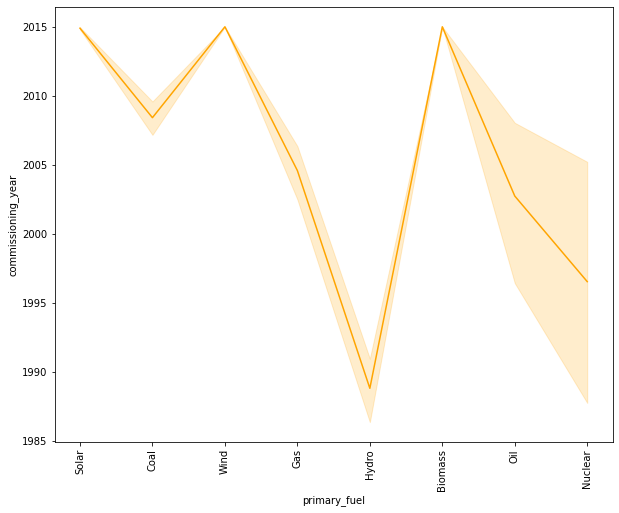

In [84]:
i = ['latitude', 'longitude', 'commissioning_year']
j = ['blue', 'red', 'orange']
for i,j in zip(i, j):
    print("\n",'-------------------------------------'+i+ '-------------------------------------')
    plt.figure(figsize=(10,8))
    sns.lineplot(x="primary_fuel",y = i ,data=df, color = j)
    plt.xticks(rotation = 90)
    plt.show()

#### Observations:- 

- Latitude:- From above graph we find that very high latitude shown in Solar and Hydro with comparison to other primary_fuel.


- Longitude: - From above graph we find that very high longitude shown in Coal, Gas and Hydro with comparison to other primary_fuel.


- Commssioning_year: - From above graph we find that only hydro primary_fuel uses less in number while other primary are mostly used. Also Solar, Wind, and Biomass primary fuel are being very higher used as per years. 


### commissioning_year

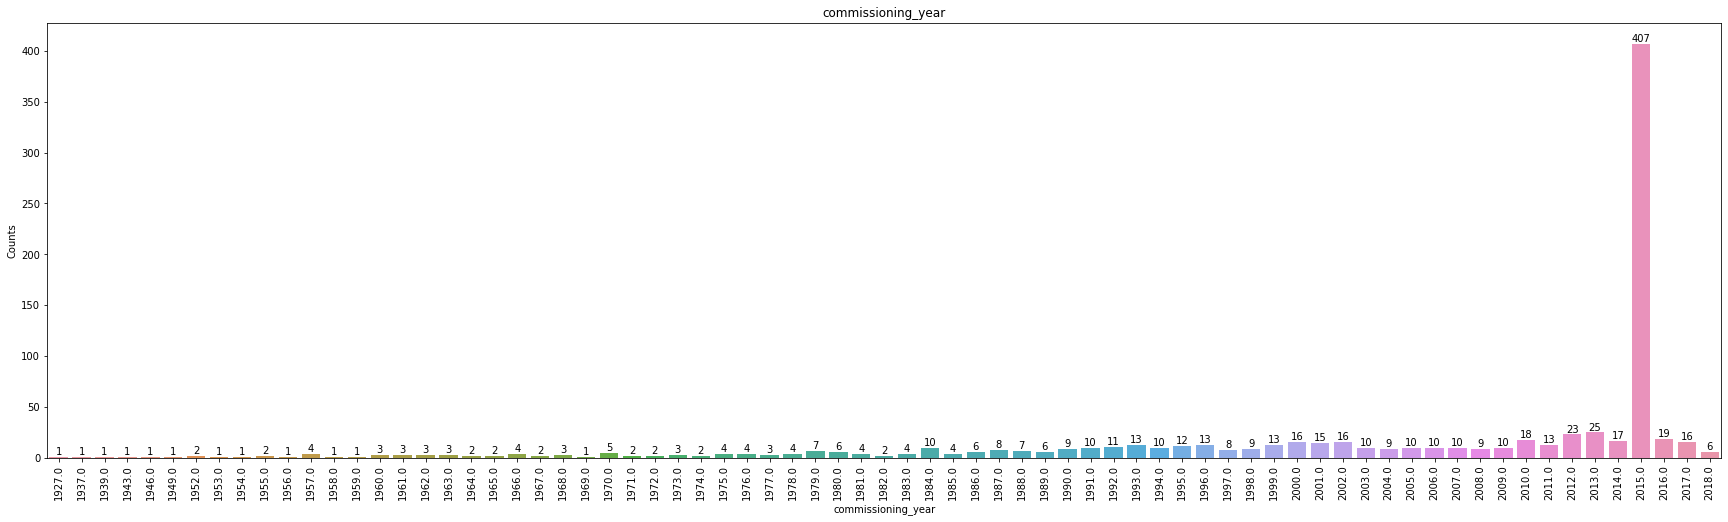

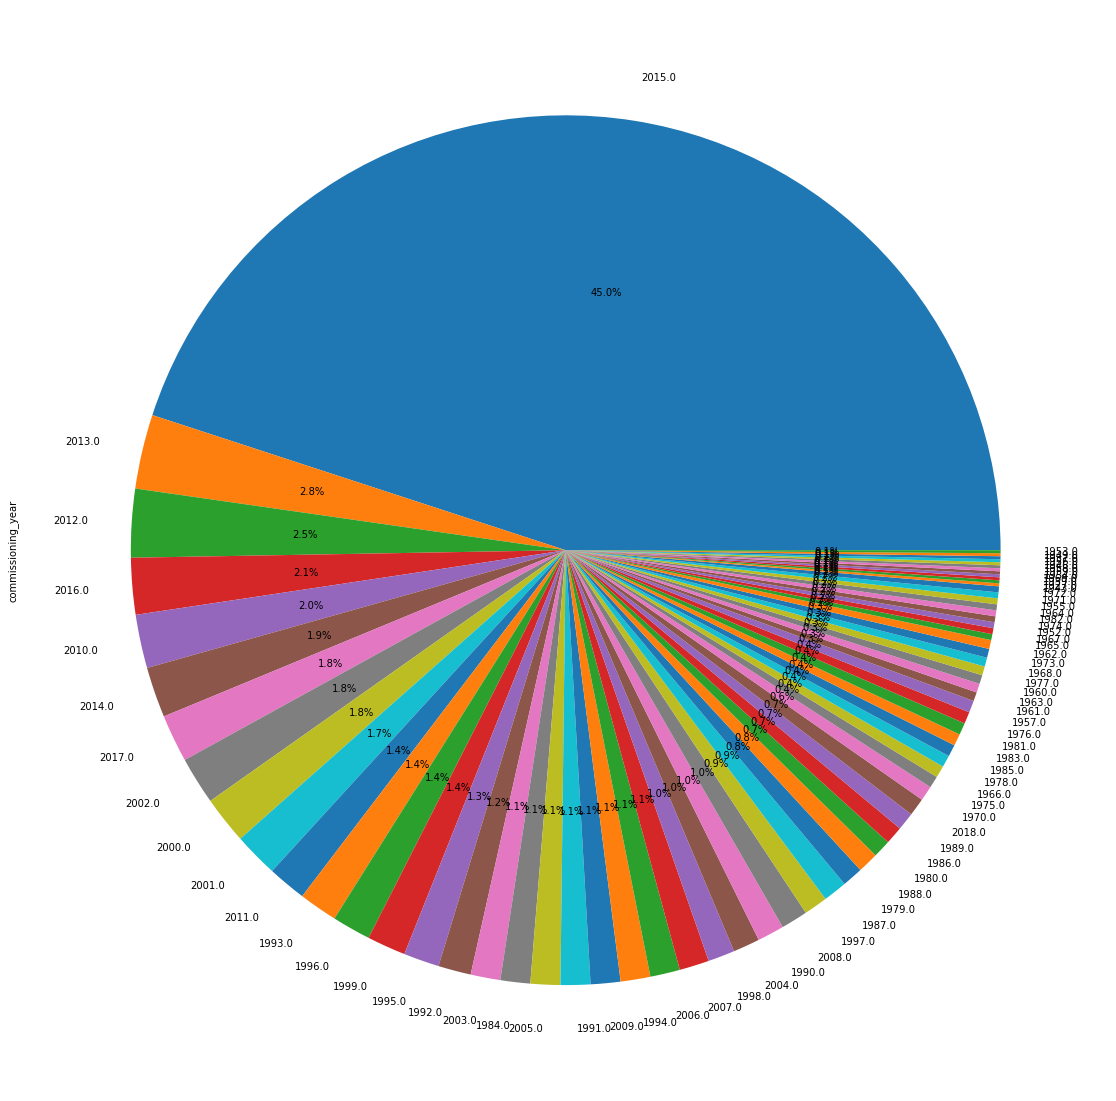

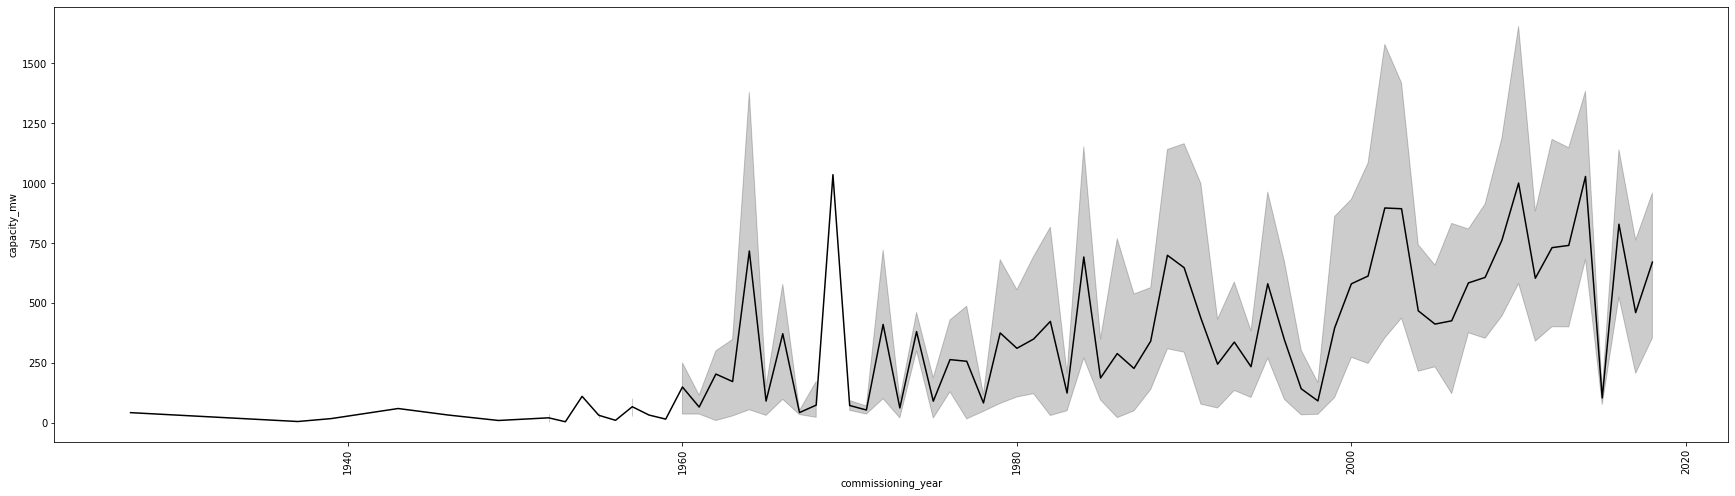

In [85]:
commissioning_year = df.commissioning_year.value_counts()
plt.figure(figsize = (30,8))
df_commissioning_year = sns.countplot(x='commissioning_year', data = df)
df_commissioning_year.set_title('commissioning_year')
df_commissioning_year.set_xlabel('commissioning_year')
df_commissioning_year.set_ylabel('Counts')
plt.xticks(rotation = 90)
for i in df_commissioning_year.containers:
    df_commissioning_year.bar_label(i)
    
# Percentage of workclass
plt.figure(figsize = (20, 20))
commissioning_year.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(30,8))
sns.lineplot(x="commissioning_year",y="capacity_mw",data=df, color='black')
plt.xticks(rotation = 90)
plt.show()

### Observations:-

In [86]:
# year      Count
# 2015.0    407
# 2013.0     25
# 2012.0     23
# 2016.0     19
# 2010.0     18
# 2014.0     17
# 2017.0     16
# 2002.0     16
# 2000.0     16
# 2001.0     15
# 2011.0     13
# 1993.0     13
# 1996.0     13
# 1999.0     13
# 1995.0     12
# 1992.0     11
# 2003.0     10
# 1984.0     10
# 2005.0     10
# 1991.0     10
# 2009.0     10
# 1994.0     10
# 2006.0     10
# 2007.0     10
# 1998.0      9
# 2004.0      9
# 1990.0      9
# 2008.0      9
# 1997.0      8
# 1987.0      8
# 1979.0      7
# 1988.0      7
# 1980.0      6
# 1986.0      6
# 1989.0      6
# 2018.0      6
# 1970.0      5
# 1975.0      4
# 1966.0      4
# 1978.0      4
# 1985.0      4
# 1983.0      4
# 1981.0      4
# 1976.0      4
# 1957.0      4
# 1961.0      3
# 1963.0      3
# 1960.0      3
# 1977.0      3
# 1968.0      3
# 1973.0      3
# 1962.0      3
# 1965.0      2
# 1967.0      2
# 1952.0      2
# 1974.0      2
# 1982.0      2
# 1964.0      2
# 1955.0      2
# 1971.0      2
# 1972.0      2
# 1943.0      1
# 1927.0      1
# 1939.0      1
# 1969.0      1
# 1954.0      1
# 1959.0      1
# 1958.0      1
# 1946.0      1
# 1956.0      1
# 1937.0      1
# 1949.0      1
# 1953.0      1

- In year 2015, 470 soure are commissioning while in other years commissioning source are lesser than 30 as per above graph and obersvations.

#### Pie Chart

In [87]:
# Year      Percentage
# 2015.0    44.972376
# 2013.0     2.762431
# 2012.0     2.541436
# 2016.0     2.099448
# 2010.0     1.988950
# 2014.0     1.878453
# 2017.0     1.767956
# 2002.0     1.767956
# 2000.0     1.767956
# 2001.0     1.657459
# 2011.0     1.436464
# 1993.0     1.436464
# 1996.0     1.436464
# 1999.0     1.436464
# 1995.0     1.325967
# 1992.0     1.215470
# 2003.0     1.104972
# 1984.0     1.104972
# 2005.0     1.104972
# 1991.0     1.104972
# 2009.0     1.104972
# 1994.0     1.104972
# 2006.0     1.104972
# 2007.0     1.104972
# 1998.0     0.994475
# 2004.0     0.994475
# 1990.0     0.994475
# 2008.0     0.994475
# 1997.0     0.883978
# 1987.0     0.883978
# 1979.0     0.773481
# 1988.0     0.773481
# 1980.0     0.662983
# 1986.0     0.662983
# 1989.0     0.662983
# 2018.0     0.662983
# 1970.0     0.552486
# 1975.0     0.441989
# 1966.0     0.441989
# 1978.0     0.441989
# 1985.0     0.441989
# 1983.0     0.441989
# 1981.0     0.441989
# 1976.0     0.441989
# 1957.0     0.441989
# 1961.0     0.331492
# 1963.0     0.331492
# 1960.0     0.331492
# 1977.0     0.331492
# 1968.0     0.331492
# 1973.0     0.331492
# 1962.0     0.331492
# 1965.0     0.220994
# 1967.0     0.220994
# 1952.0     0.220994
# 1974.0     0.220994
# 1982.0     0.220994
# 1964.0     0.220994
# 1955.0     0.220994
# 1971.0     0.220994
# 1972.0     0.220994
# 1943.0     0.110497
# 1927.0     0.110497
# 1939.0     0.110497
# 1969.0     0.110497
# 1954.0     0.110497
# 1959.0     0.110497
# 1958.0     0.110497
# 1946.0     0.110497
# 1956.0     0.110497
# 1937.0     0.110497
# 1949.0     0.110497
# 1953.0     0.110497

- 44 percentage of the global power plant are commissioned in year 2015 while in other years 3 percent of the plant not commissioned as per above graph and observations dataset.

#### Line Plot

- As per graph capacity_mw are start increasing from the commissioning year 1960 and year high in number as per above graph years 

## Categorical Plot

### Primary_fuel with respect to capacity_mw

<Figure size 1080x576 with 0 Axes>

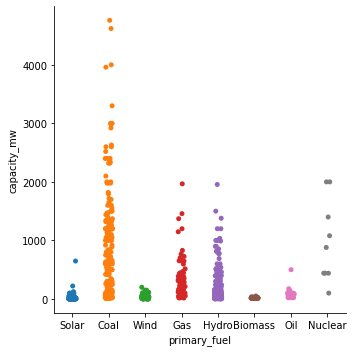

In [88]:
plt.figure(figsize = (15,8))
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)

#### Observations:- Coal and Hydro having high capacity_mv than others primary_fuels.

### Primary_fuel with respect to latitude

<Figure size 1080x576 with 0 Axes>

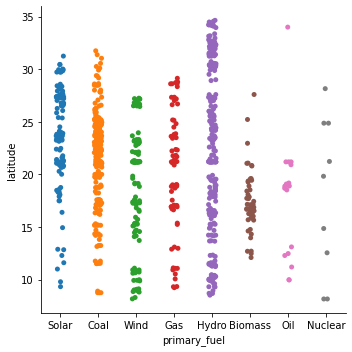

In [89]:
plt.figure(figsize = (15,8))
sns.catplot(x = "primary_fuel", y = "latitude", data = df)

#### Observations:- Hydro, Coal, Solar and Gas primary fuel show high latitude than others as per above graph.

### Primary_fuel with respect to longitude

<Figure size 1080x576 with 0 Axes>

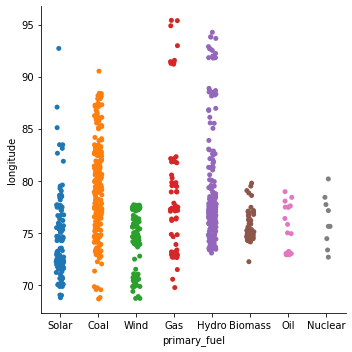

In [90]:
plt.figure(figsize = (15,8))
sns.catplot(x = "primary_fuel", y = "longitude", data = df)

#### Observations: As per above graph Gas, Hydro, Coal having high longitude in primary fuels.

### Box Plot

In [91]:
df_num = df.select_dtypes(exclude = 'object').columns

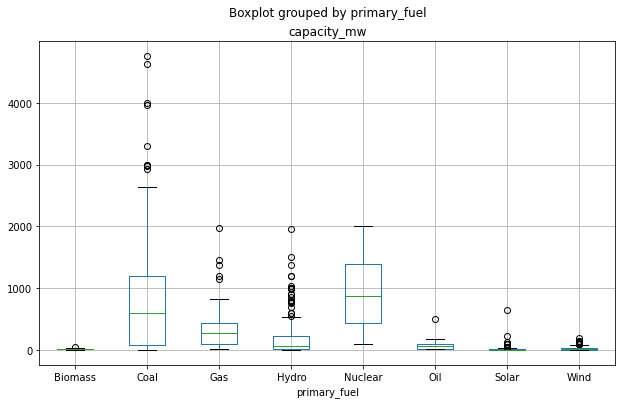

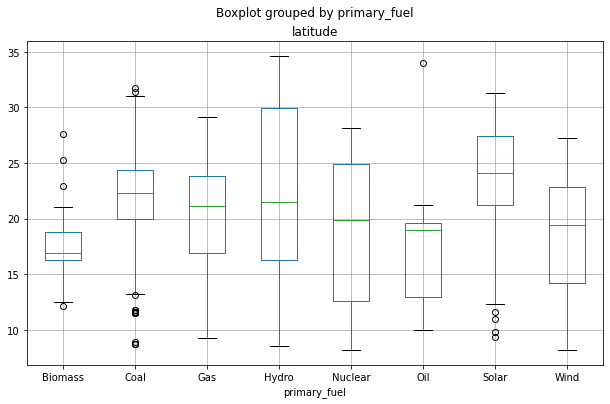

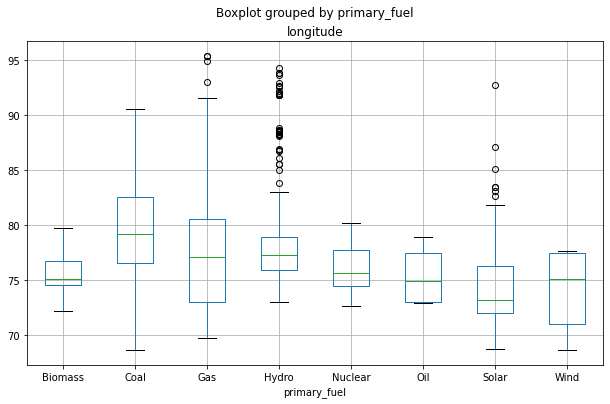

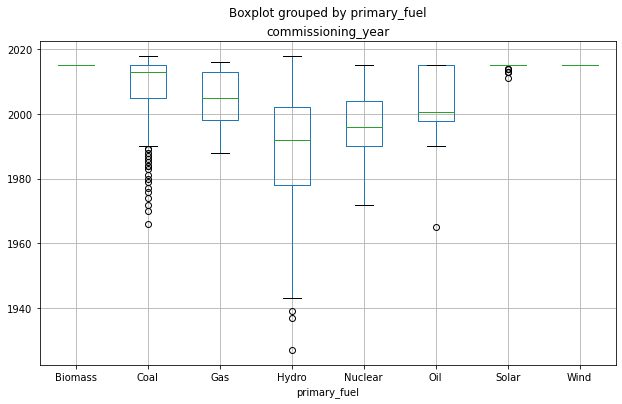

In [92]:
for i in df_num:
    df.boxplot(column = i, by = 'primary_fuel', figsize = (10,6))    

### Observations:-
   - capacity_mw: All dataset having outliers in capacity_mw except Nuclear primary_fuel.
   

   - latitude: In latitude Biomass, Coal, Oil and Solar having outliers as per above graph.
   

   - longitude: In longitude Gas, Hydro and Solar having outliers as per above graph.
    

### Bivariate Analysis of Numerical Dataset

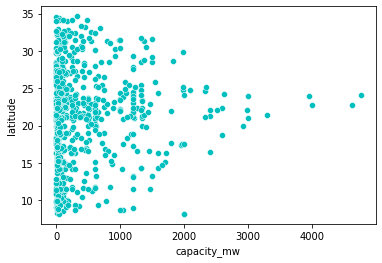

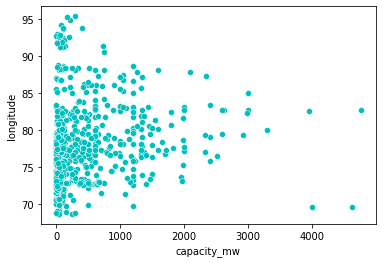

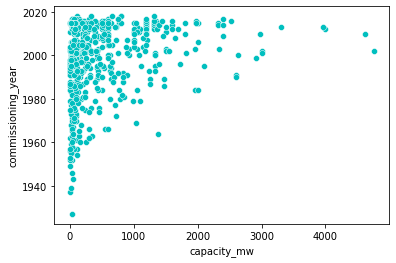

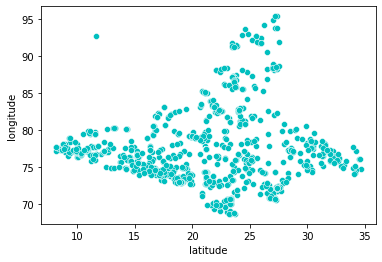

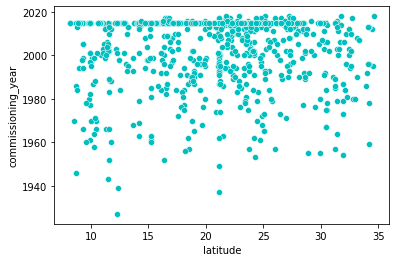

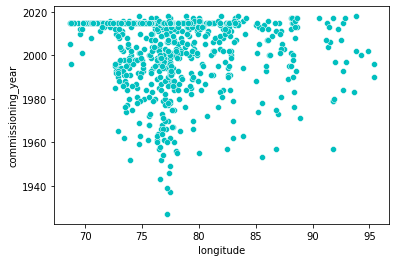

In [93]:
for i in range(len(df_num)):
    for j in df_num[i+1:]:
        plt.figure()
        sns.scatterplot(df[df_num[i]], df[j], color = 'c')

### Observations:- 
   - From above two graph we didn't find any common pattern of data.
   - BUt in case of longitude and latitude case it shows some linear increament from 15 range  of latitude.

### Inline Plot

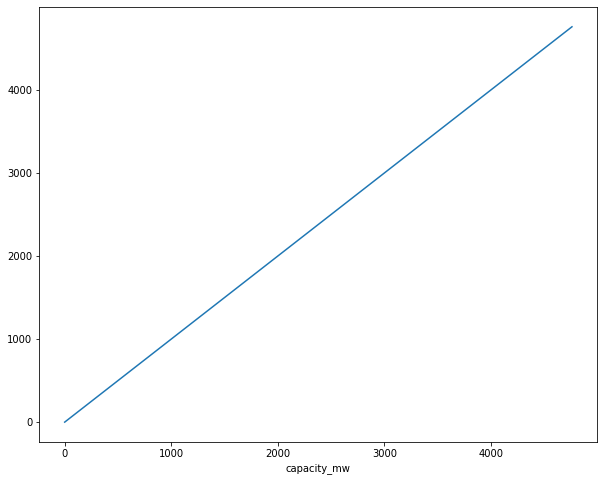

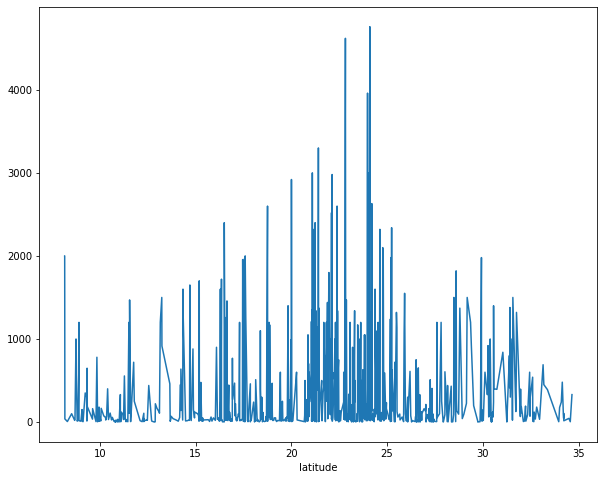

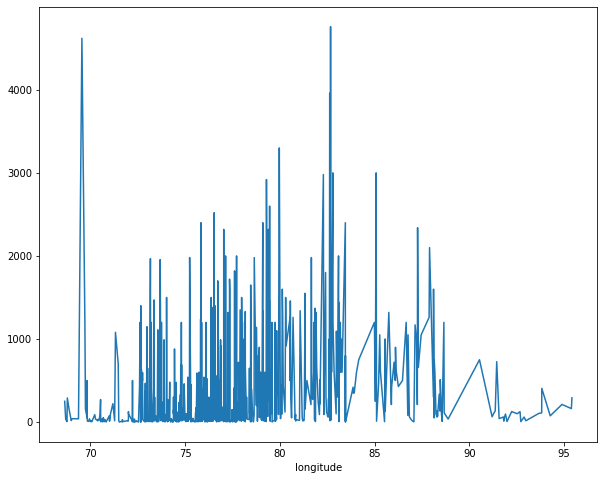

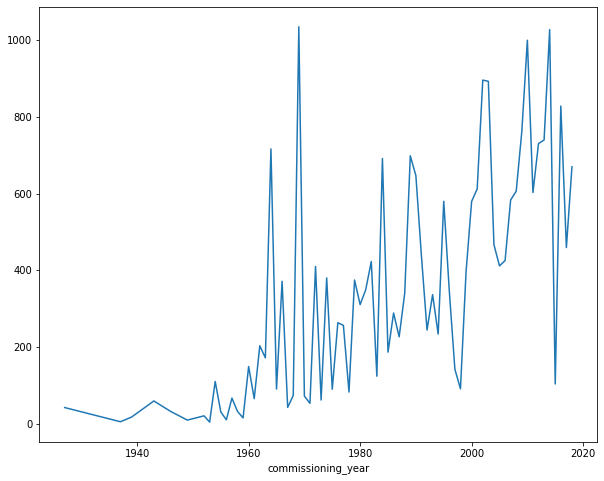

In [94]:
for i in df_num:
    plt.figure(figsize = (10,8))
    df.groupby(i)['capacity_mw'].mean().plot()
    plt.show()

#### Observations: We didn't find any common data present in the above graphs.

## Violin Plot

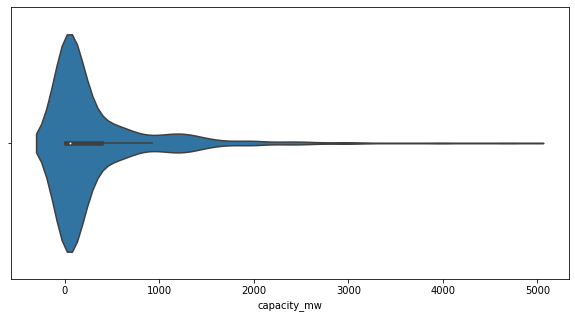

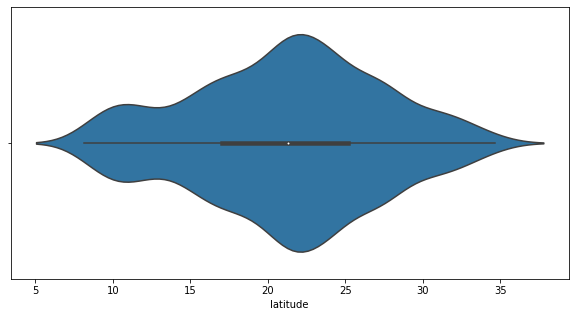

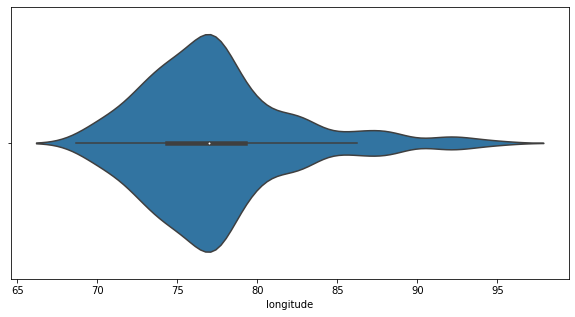

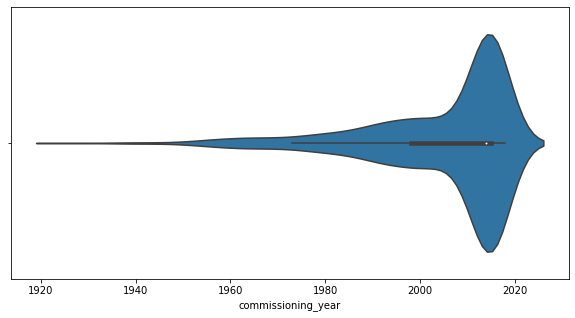

In [95]:
for i in df_num:
    plt.figure(figsize = (10,5))
    sns.violinplot(df[i] , data = df)
    
    
# checking spreading density of the data

#### Observations:-
   - In capacity_mw most of the density lies in the range approx 0 to 950 as per graph.
   

   - In latitude most of the density lies in the range approx 5 to 35.
   

   - In longitue most of the density lies in the range approx 70 to 85.



### Checking Distribution of the Dataset

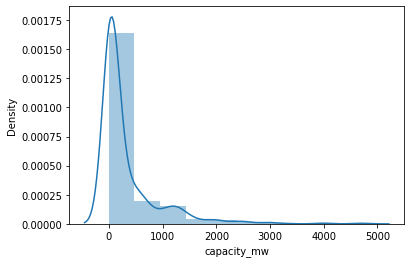

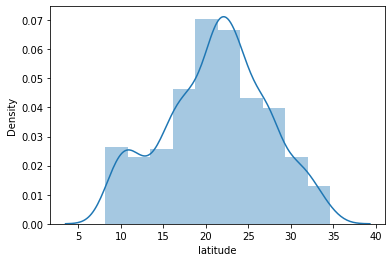

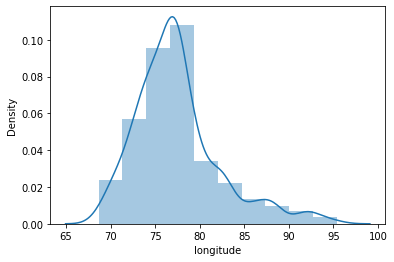

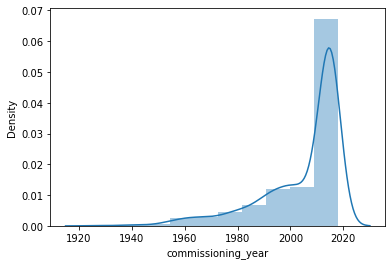

In [96]:
for i in df_num:
    plt.figure()
    sns.distplot(df[i], bins = 10)

#### Observations:- 
    
- In capacity_mw most of the values lies in the range approx 0 to 950 as per graph.

- In latitude most of the values lies in the range approx 5 to 35.

- In longitue most of the values lies in the range approx 70 to 85.



## Checking Outliers

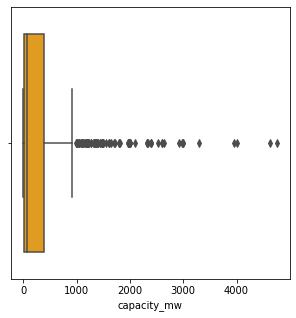

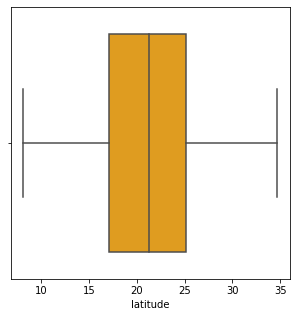

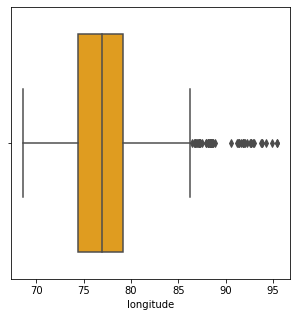

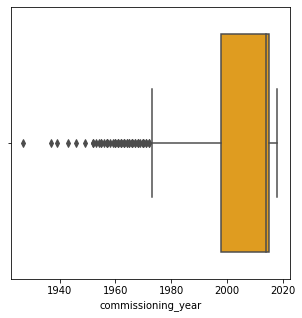

In [97]:
for i in df_num:
    plt.figure(figsize = (5,5))
    sns.boxplot(df[i], orient='v', color='orange')

#### Observations:-
  - capacity_mw having outiers in range of approx 1000 to 4000
  - longitude having outliers in the range of approx 85 to 95

## Checking Skewness

In [98]:
df[df_num].skew()

capacity_mw           3.119560
latitude             -0.149756
longitude             1.140041
commissioning_year   -1.717697
dtype: float64

<Figure size 72x36 with 0 Axes>

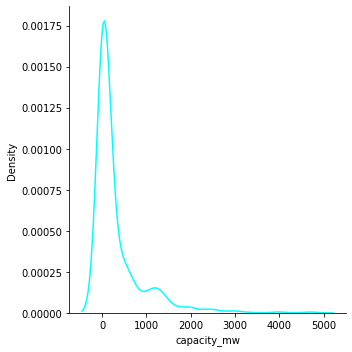

<Figure size 72x36 with 0 Axes>

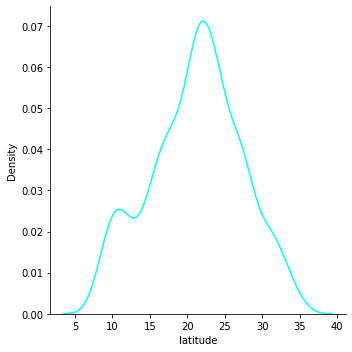

<Figure size 72x36 with 0 Axes>

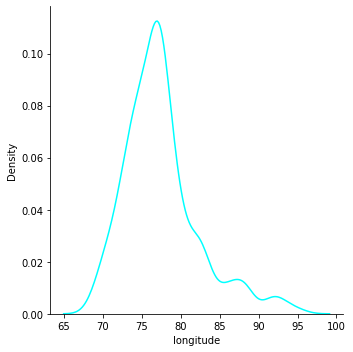

<Figure size 72x36 with 0 Axes>

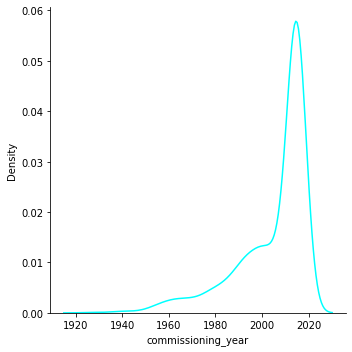

In [99]:
for i in df_num:
    plt.figure(figsize = (1,0.5))
    sns.displot(df[i], kind = 'kde', color = 'cyan',)

#### Observations: - 
   - In capacity_mw dataset shows right skewness.

   - In latitude dataset shows left skewness.

   - In longitue dataset shows right skewness.



## Checking Overall of the Dataset by Pairplot

<Figure size 1080x1080 with 0 Axes>

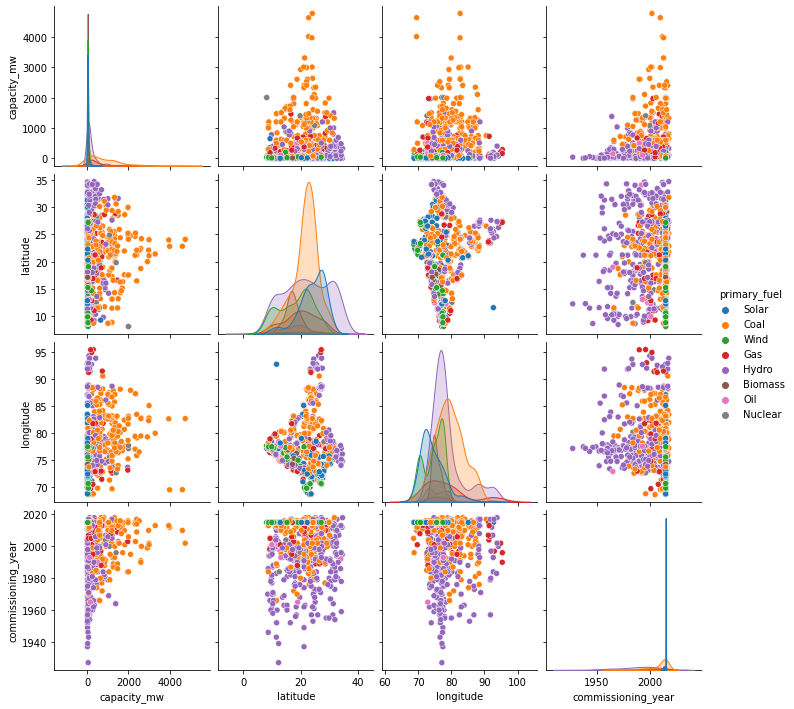

In [100]:
plt.figure(figsize = (15,15))
sns.pairplot(df, hue = 'primary_fuel')

#### Observations: 
   - From above graph we find that most of the dataset are of Coal and Hydro lies.
   - Rest all details are match as per univariate and bivariate analysis.

In [101]:
# longitude and latitude show India map structure.

## Preprocessing of the dataset

In [102]:
df.head(5)

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   
1         98.0   24.7663    74.6090         Coal              2015.0   
2         39.2   21.9038    69.3732         Wind              2015.0   
3        135.0   23.8712    91.3602          Gas              2004.0   
4       1800.0   21.9603    82.4091         Coal              2015.0   

                                 source                    geolocation_source  
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory  
1                  Ultratech Cement ltd                                   WRI  
2                                   CDM                                   WRI  
3         Central Electricity Authority                                   WRI  
4         Central Electricity Authority                                   WRI

In [103]:
df1 = df.copy() # copying data for model building for predicting primary_fuel

In [104]:
df1.head()

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   
1         98.0   24.7663    74.6090         Coal              2015.0   
2         39.2   21.9038    69.3732         Wind              2015.0   
3        135.0   23.8712    91.3602          Gas              2004.0   
4       1800.0   21.9603    82.4091         Coal              2015.0   

                                 source                    geolocation_source  
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory  
1                  Ultratech Cement ltd                                   WRI  
2                                   CDM                                   WRI  
3         Central Electricity Authority                                   WRI  
4         Central Electricity Authority                                   WRI

### Label Encoder for target variable

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [106]:
df1['primary_fuel'] = le.fit_transform(df1['primary_fuel'])
df1.head(2)

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407             6              2011.0   
1         98.0   24.7663    74.6090             1              2015.0   

                                 source                    geolocation_source  
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory  
1                  Ultratech Cement ltd                                   WRI

#### Using OrdinalEncoder for making similar dataset for dependent variables

In [107]:
from sklearn.preprocessing import OrdinalEncoder
onc = OrdinalEncoder()

In [108]:
for i in df1.select_dtypes(include = 'object').columns:
    df1[i] = onc.fit_transform(df1[i].values.reshape(-1,1))

df1.head()

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  source  \
0          2.5   28.1839    73.2407             6              2011.0   109.0   
1         98.0   24.7663    74.6090             1              2015.0   174.0   
2         39.2   21.9038    69.3732             7              2015.0    21.0   
3        135.0   23.8712    91.3602             2              2004.0    22.0   
4       1800.0   21.9603    82.4091             1              2015.0    22.0   

   geolocation_source  
0                 1.0  
1                 2.0  
2                 2.0  
3                 2.0  
4                 2.0

#### 

## Removing Outliers from the Dataset

In [109]:
from scipy.stats import zscore

z = np.abs(zscore(df1))

# taking thresold value = 3
#np.where(z>3)

df_z = df1[(z<3.1).all(axis = 1)]

In [110]:
np.where(z>3)  

(array([ 15,  71,  80, 143, 147, 179, 183, 191, 209, 222, 244, 299, 308,
        321, 323, 333, 340, 342, 345, 360, 363, 364, 374, 415, 426, 443,
        453, 477, 481, 483, 492, 493, 498, 518, 537, 540, 545, 572, 576,
        582, 600, 620, 637, 647, 656, 660, 668, 687, 693, 704, 707, 724,
        726, 765, 784, 786, 805, 806, 816, 830, 846, 868, 869, 877, 878,
        893, 898], dtype=int64),
 array([0, 5, 5, 0, 0, 2, 2, 5, 0, 4, 2, 5, 0, 5, 2, 2, 2, 4, 5, 2, 0, 0,
        0, 2, 2, 4, 4, 4, 0, 4, 0, 0, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 0,
        0, 5, 5, 5, 0, 4, 4, 0, 4, 0, 0, 0, 4, 0, 2, 5, 4, 5, 5, 5, 0, 5,
        5], dtype=int64))

In [111]:
print(df_z.shape)
print(df.shape)

(851, 7)
(905, 7)


In [112]:
percentage = round((905-851)/905*100,2)
print(percentage, "Percentage of data loss")  

5.97 Percentage of data loss


#### 

## Removing Outliers with Interquartile Method

In [113]:
Q1 = df1.quantile(.25)
Q3 = df1.quantile(.75)
IQR = Q3 - Q1

In [114]:
df_IQR = df[~((df1<(Q1 - 1.5*IQR)) | (df1>(Q3 + 1.5*IQR))).any(axis = 1)]

In [115]:
print(df_IQR.shape)
print(df.shape)

(453, 7)
(905, 7)


In [116]:
percentage = round((905-453)/905*100,2)
print(percentage, "Percentage of data loss")  

49.94 Percentage of data loss


### From above two methods of removing outliers we find that Zscore give lesser data loss with respect to interquartile method hence we are selecting Zscore method for removing outliers.

In [117]:
df_z.describe()

capacity_mw    latitude   longitude  primary_fuel  commissioning_year  \
count   851.000000  851.000000  851.000000    851.000000          851.000000   
mean    277.715971   21.129225   77.180136      3.260870         2005.413631   
std     438.757672    6.119080    4.432863      2.306025           14.306576   
min       0.000000    8.168900   68.644700      0.000000         1957.000000   
25%      16.500000   16.932850   74.329400      1.000000         1999.000000   
50%      54.500000   21.226100   76.830200      3.000000         2015.000000   
75%     341.250000   25.148400   79.039200      6.000000         2015.000000   
max    2100.000000   34.649000   92.227900      7.000000         2018.000000   

           source  geolocation_source  
count  851.000000          851.000000  
mean    43.444183            1.727380  
std     43.332885            0.683204  
min      0.000000            0.000000  
25%     22.000000            2.000000  
50%     22.000000            2.000000  
75%     33.500000            2.000000  
max    182.000000            2.000000

<AxesSubplot:>

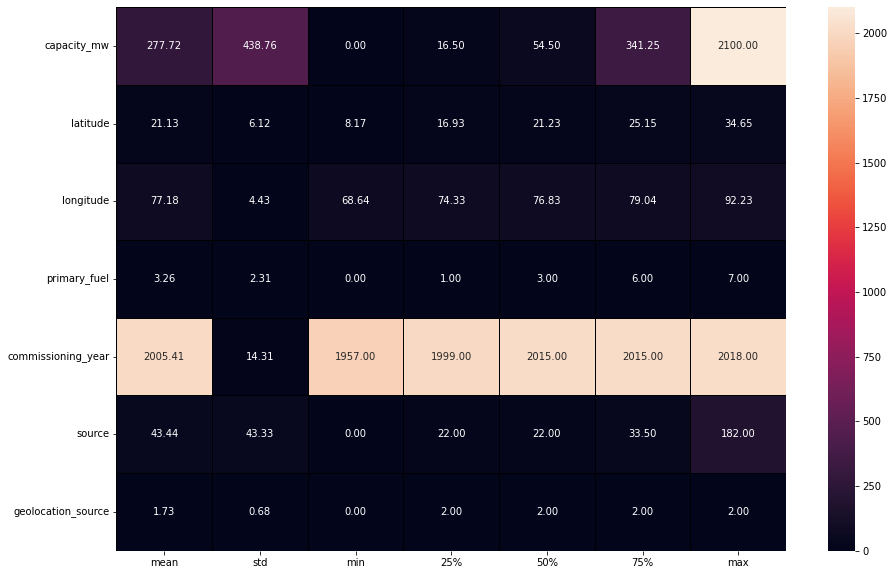

In [118]:
plt.figure(figsize = (15,10))
sns.heatmap(df_z.describe()[1:].transpose(), annot = True, linecolor='black', linewidths=0.5, fmt = '.2f')

#checking description visually

#### From above code we find that capacity max values are much higher than its dataset value from this we conclude that this column dataset probably having outliers.

### Checking Correlation of the Dataset

In [119]:
df_z.corr()

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw            1.000000  0.047812   0.258548     -0.406666   
latitude               0.047812  1.000000  -0.000732     -0.011337   
longitude              0.258548 -0.000732   1.000000     -0.380754   
primary_fuel          -0.406666 -0.011337  -0.380754      1.000000   
commissioning_year    -0.061330  0.024488  -0.171256      0.184083   
source                -0.273189  0.064575  -0.243614      0.047345   
geolocation_source     0.234801 -0.189938   0.273010     -0.474534   

                    commissioning_year    source  geolocation_source  
capacity_mw                  -0.061330 -0.273189            0.234801  
latitude                      0.024488  0.064575           -0.189938  
longitude                    -0.171256 -0.243614            0.273010  
primary_fuel                  0.184083  0.047345           -0.474534  
commissioning_year            1.000000  0.329841           -0.266610  
source                        0.329841  1.000000           -0.503686  
geolocation_source           -0.266610 -0.503686            1.000000

<AxesSubplot:>

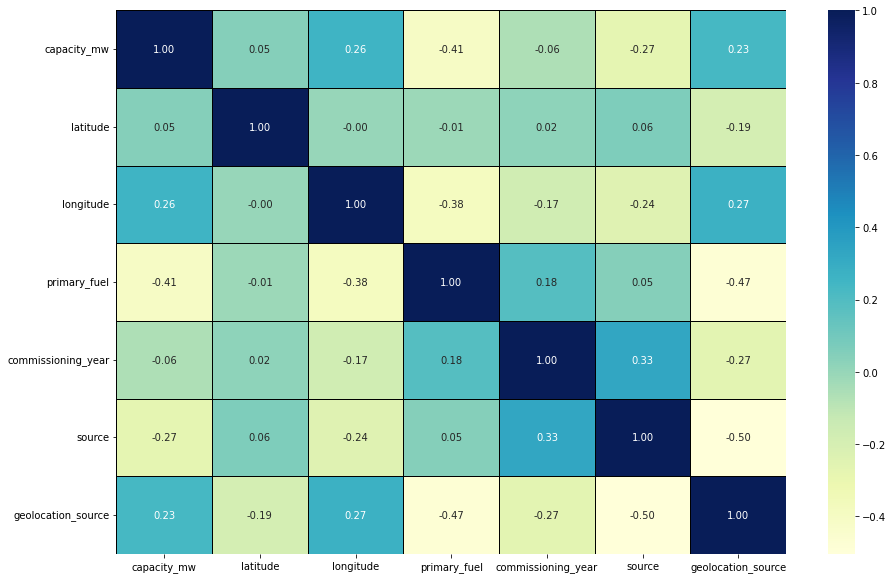

In [120]:
plt.figure(figsize = (15,10))
sns.heatmap(df_z.corr(), annot = True, linecolor = 'black', linewidths = 1, fmt = '.2f', cmap="YlGnBu" )

#### 
- From above code we find that there is normal acceptable correlation between dataset. 
- Also we can say for latitude that there is very less correlation with respect to capacity_mw and longitude.

### Checking Positive and Negative Correlation

<AxesSubplot:>

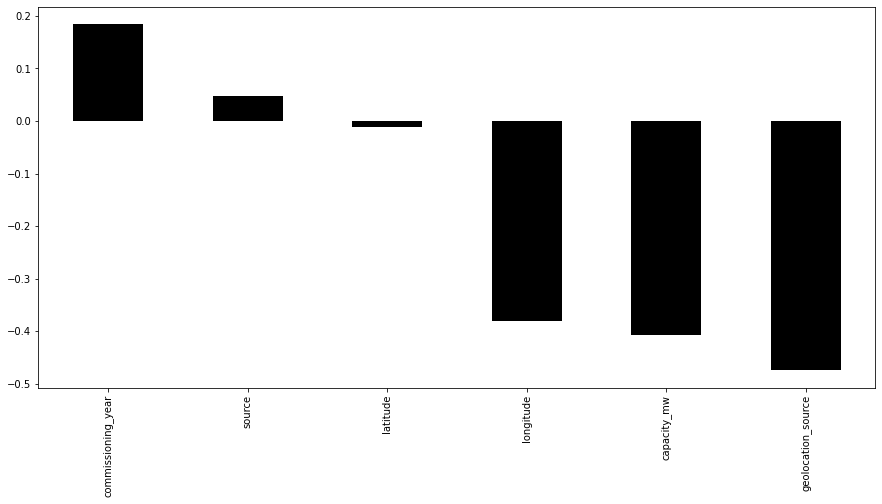

In [121]:
plt.figure(figsize = (15,7))
df_z.corr()['primary_fuel'].sort_values(ascending = False).drop('primary_fuel').plot(kind = 'bar', color = 'k')

#### Observations: - Above dataset shows commissioning_year, source, latitude shows positive correlation with respect to primary_fuel while rest of dataset shows negative correlation.

### Dividing data for feature selection

In [122]:
x = df_z.drop('primary_fuel', axis = 1)
y = df_z['primary_fuel']

In [123]:
print('shape of x', x.shape)
print('Shape of y', y.shape)

shape of x (851, 6)
Shape of y (851,)


### Checking skewness of the dataset

In [124]:
x.skew()

capacity_mw           2.000305
latitude             -0.121387
longitude             0.961152
commissioning_year   -1.519246
source                1.782440
geolocation_source   -2.123577
dtype: float64

In [125]:
# from sklearn.preprocessing import PowerTransformer
# pw = PowerTransformer('yeo-johnson')

In [126]:
# x = pw.fit_transform(x)
# x.skew()

#### We tried power transformer method but not getting good result hence used log method 

In [127]:
x['capacity_mw'] = np.log(1 + x['capacity_mw'])
x.skew()

capacity_mw           0.076952
latitude             -0.121387
longitude             0.961152
commissioning_year   -1.519246
source                1.782440
geolocation_source   -2.123577
dtype: float64

As per low dataset we can consider it for model building.

### Checking multicolinearity of the dataset

In [128]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['Variance'] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [130]:
calc_vif(x)  # checking VIF of numerical columns

Variance  VIF Factor
0         capacity_mw    9.242953
1            latitude   13.779109
2           longitude  341.213765
3  commissioning_year  339.240089
4              source    2.862123
5  geolocation_source   11.905740

In [131]:
# 	Variance	VIF Factor
# 0	capacity_mw	9.242953
# 1	latitude	13.779109
# 2	longitude	341.213765
# 3	commissioning_year	339.240089
# 4	source	2.862123
# 5	geolocation_source	11.905740

# From above information we find that longitude and commission year show high collinearity but as per observations 
# we know that commissioning year is a categorical dataset , thats why it is showing very high correlation.
# Hence due to low dataset we are not dropping it.

### Using SMOTE to balance the dataset

In [132]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [133]:
x, y = sm.fit_resample(x, y)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

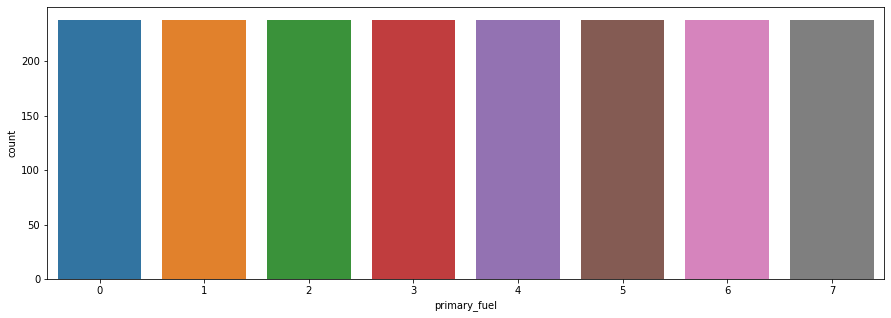

In [134]:
plt.figure(figsize = (15,5))
sns.countplot(y)

## Standard Scalling

In [135]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [136]:
x_scale = sc.fit_transform(x)

In [137]:
x = pd.DataFrame(data = x_scale, columns = x.columns)

In [138]:
x.head()

capacity_mw  latitude  longitude  commissioning_year    source  \
0    -1.718591  1.448767  -0.830494            0.409936  1.324118   
1     0.177294  0.853840  -0.467349            0.729630  2.743551   
2    -0.333924  0.355543  -1.856924            0.729630 -0.597576   
3     0.357410  0.698023   3.978397           -0.149527 -0.575739   
4     1.822816  0.365378   1.602787            0.729630 -0.575739   

   geolocation_source  
0           -1.185671  
1            0.370437  
2            0.370437  
3            0.370437  
4            0.370437

### Feature Selection

In [140]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [141]:
class best_model:
    def best_fit(x, y, model):
        random_state_values = []
        for i in range(0,200):
            x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
            model.fit(x_train, y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)

            if round(accuracy_score(y_train, pred_train)*100,1) == round(accuracy_score(y_test, pred_test)*100,1):
                print("At random_state:-", i)
                print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
                print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
                print("\n")
                random_state_values.append(i)
        print("Best fit random_state_values", random_state_values)
    
    
    def final_model(x, y, model, i):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        print("At random state", i , "model giving best accuracy score","\n")
        Train_accuracy = accuracy_score(pred_train, y_train)
        Test_accuracy = accuracy_score(pred_test, y_test)
        print('Training accuracy:- ', Train_accuracy*100)
        print('Testing accuracy:- ', Test_accuracy*100)
        print("\n")
        print('--------------------------------------')
        print('Confusion Matrix')
        print(confusion_matrix(pred_test, y_test) )
        print("\n")
        print('Classification Report')
        print(classification_report(pred_test, y_test) )
        

    def cross_val_score(model, x, y):
        for value in range(2,8):
            cv = cross_val_score(model, x, y, cv = value).mean()
            print('cross_val_score', cv*100,'at cv =', value,"\n")


## Model 1 Logisitc Regression

In [747]:
model = LogisticRegression()

In [743]:
best_model.best_fit(x, y, model)   #finding best random state

At random_state:- 2
Training accuracy_score is:- 69.44444444444444
Testing accuracy_score is:- 69.4055944055944


At random_state:- 120
Training accuracy_score is:- 68.16816816816817
Testing accuracy_score is:- 68.18181818181817


At random_state:- 169
Training accuracy_score is:- 68.54354354354354
Testing accuracy_score is:- 68.53146853146853


At random_state:- 185
Training accuracy_score is:- 68.24324324324324
Testing accuracy_score is:- 68.18181818181817


Best fit random_state_values [2, 120, 169, 185]


#### Model giving best accuracy score at random state value 2

In [744]:
best_model.final_model(x, y, model, 2)

At random state 2 model giving best accuracy score 

Training accuracy:-  69.44444444444444
Testing accuracy:-  69.4055944055944


--------------------------------------
Confusion Matrix
[[54  8  2  0  0 11  0  0]
 [ 0 41 18 14  0  2  1  0]
 [ 0  7 21  4  0  3  0  5]
 [ 0  2  1 43  6 15  0  0]
 [ 0 12 10  5 69  4  0  0]
 [ 1  2 10 14  0 42  0  0]
 [ 0  0  0  0  0  0 60  0]
 [ 5  3  1  5  0  4  0 67]]


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.72      0.80        75
           1       0.55      0.54      0.54        76
           2       0.33      0.53      0.41        40
           3       0.51      0.64      0.57        67
           4       0.92      0.69      0.79       100
           5       0.52      0.61      0.56        69
           6       0.98      1.00      0.99        60
           7       0.93      0.79      0.85        85

    accuracy                           0.69       572
   macro avg       0.70      0

In [748]:
best_model.cross_val_score(model, x, y)

cross_val_score 68.27731092436974 at cv = 2 

cross_val_score 68.38297026751783 at cv = 3 

cross_val_score 68.90756302521008 at cv = 4 

cross_val_score 68.64511672882996 at cv = 5 

cross_val_score 68.12044917961232 at cv = 6 

cross_val_score 68.38235294117648 at cv = 7 



## Model 2 MultinomialNB

In [751]:
model = GaussianNB()

In [746]:
best_model.best_fit(x, y, model)  #finding best random state

At random_state:- 78
Training accuracy_score is:- 52.1021021021021
Testing accuracy_score is:- 52.09790209790209


At random_state:- 158
Training accuracy_score is:- 52.1021021021021
Testing accuracy_score is:- 52.09790209790209


At random_state:- 159
Training accuracy_score is:- 52.1021021021021
Testing accuracy_score is:- 52.09790209790209


At random_state:- 190
Training accuracy_score is:- 51.87687687687688
Testing accuracy_score is:- 51.92307692307693


Best fit random_state_values [78, 158, 159, 190]


#### Model giving best accuracy score at random state value 78

In [752]:
best_model.final_model(x, y, model, 78)

At random state 78 model giving best accuracy score 

Training accuracy:-  52.1021021021021
Testing accuracy:-  52.09790209790209


--------------------------------------
Confusion Matrix
[[73 13  9  0  0 21  0  0]
 [ 0  5  0  0  0  0  0  0]
 [ 0  1  1  0  4  0  0  0]
 [ 0 59 52 74 60 46  0  0]
 [ 0  0  1  0  4  0  0  0]
 [ 0  0  5  0  0  3  3  0]
 [ 0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  0  0 78]]


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       116
           1       0.06      1.00      0.12         5
           2       0.01      0.17      0.03         6
           3       1.00      0.25      0.41       291
           4       0.06      0.80      0.11         5
           5       0.04      0.27      0.07        11
           6       0.95      1.00      0.98        60
           7       1.00      1.00      1.00        78

    accuracy                           0.52       572
   macro avg       0.52      

In [753]:
best_model.cross_val_score(model, x, y)

cross_val_score 51.78571428571428 at cv = 2 

cross_val_score 51.891005737847436 at cv = 3 

cross_val_score 51.83823529411764 at cv = 4 

cross_val_score 51.89073076391766 at cv = 5 

cross_val_score 51.891587140977045 at cv = 6 

cross_val_score 51.94327731092437 at cv = 7 



## Model 3 Support Vector Classifier

In [756]:
model = SVC()

In [757]:
best_model.best_fit(x, y, model)  #finding best random state

At random_state:- 5
Training accuracy_score is:- 81.98198198198197
Testing accuracy_score is:- 81.99300699300699


At random_state:- 8
Training accuracy_score is:- 81.45645645645646
Testing accuracy_score is:- 81.46853146853147


At random_state:- 14
Training accuracy_score is:- 81.45645645645646
Testing accuracy_score is:- 81.46853146853147


At random_state:- 163
Training accuracy_score is:- 81.75675675675676
Testing accuracy_score is:- 81.81818181818183


At random_state:- 191
Training accuracy_score is:- 80.63063063063063
Testing accuracy_score is:- 80.5944055944056


Best fit random_state_values [5, 8, 14, 163, 191]


#### Model giving best accuracy score at random state value 5

In [758]:
best_model.final_model(x, y, model, 5)

At random state 5 model giving best accuracy score 

Training accuracy:-  81.98198198198197
Testing accuracy:-  81.99300699300699


--------------------------------------
Confusion Matrix
[[54  9  0  0  0  0  0  0]
 [ 0 42  8  3  0  3  2  0]
 [ 1  3 29  2  0  1  0  0]
 [ 0  5  0 45  0  6  0  0]
 [ 0  8 15  3 86  1  0  0]
 [ 0  0 11  5  0 59  0  0]
 [ 0  0  0  0  0  0 73  0]
 [ 5  7  2  1  0  2  0 81]]


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        63
           1       0.57      0.72      0.64        58
           2       0.45      0.81      0.57        36
           3       0.76      0.80      0.78        56
           4       1.00      0.76      0.86       113
           5       0.82      0.79      0.80        75
           6       0.97      1.00      0.99        73
           7       1.00      0.83      0.91        98

    accuracy                           0.82       572
   macro avg       0.81      

In [759]:
best_model.cross_val_score(model, x, y)

cross_val_score 79.09663865546219 at cv = 2 

cross_val_score 79.77951099961085 at cv = 3 

cross_val_score 80.67226890756302 at cv = 4 

cross_val_score 80.40958695952479 at cv = 5 

cross_val_score 80.1466843904794 at cv = 6 

cross_val_score 80.46218487394958 at cv = 7 



## Model 4 SGDClassifier

In [797]:
model = SGDClassifier()

In [765]:
best_model.best_fit(x, y, model)  #finding best random state

At random_state:- 9
Training accuracy_score is:- 65.69069069069069
Testing accuracy_score is:- 65.73426573426573


At random_state:- 105
Training accuracy_score is:- 62.91291291291291
Testing accuracy_score is:- 62.93706293706294


At random_state:- 182
Training accuracy_score is:- 58.63363363363363
Testing accuracy_score is:- 58.56643356643356


Best fit random_state_values [9, 105, 182]


#### Model giving best accuracy score at random state value 9

In [769]:
best_model.final_model(x, y, model, 9)

At random state 9 model giving best accuracy score 

Training accuracy:-  56.08108108108109
Testing accuracy:-  57.16783216783217


--------------------------------------
Confusion Matrix
[[ 2  0  0  0  0  0  0  0]
 [ 7 54 47 14  6  9  0  5]
 [37  2  3  0  0  6  0  0]
 [ 0  6  8 47 10 16  0  0]
 [ 0  3  8  3 41  0  0  0]
 [10  4 12 10  2 38  0  0]
 [ 0  0  0  0  0  0 65  0]
 [14  4  0  1  0  1  0 77]]


Classification Report
              precision    recall  f1-score   support

           0       0.03      1.00      0.06         2
           1       0.74      0.38      0.50       142
           2       0.04      0.06      0.05        48
           3       0.63      0.54      0.58        87
           4       0.69      0.75      0.72        55
           5       0.54      0.50      0.52        76
           6       1.00      1.00      1.00        65
           7       0.94      0.79      0.86        97

    accuracy                           0.57       572
   macro avg       0.58      

In [798]:
best_model.cross_val_score(model, x, y)

cross_val_score 61.29201680672269 at cv = 2 

cross_val_score 62.50022769235864 at cv = 3 

cross_val_score 62.71008403361344 at cv = 4 

cross_val_score 62.604917806326846 at cv = 5 

cross_val_score 62.55265890257855 at cv = 6 

cross_val_score 64.18067226890756 at cv = 7 



### Above SGD classifier shows different different testing and training accuracy when we trying to find best random state hence this model shows overfitting hence we cannot consider it for machine learning.

#### 

## Model 5 Decision Tree Classifier

In [771]:
model = DecisionTreeClassifier()

In [787]:
for i in range(80,92):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        print("At random_state:-", i)
        print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
        print("\n")

At random_state:- 80
Training accuracy_score is:- 89.93993993993993
Testing accuracy_score is:- 85.66433566433567


At random_state:- 81
Training accuracy_score is:- 89.63963963963964
Testing accuracy_score is:- 84.79020979020979


At random_state:- 82
Training accuracy_score is:- 91.29129129129129
Testing accuracy_score is:- 86.36363636363636


At random_state:- 83
Training accuracy_score is:- 89.33933933933935
Testing accuracy_score is:- 87.58741258741259


At random_state:- 84
Training accuracy_score is:- 89.71471471471472
Testing accuracy_score is:- 87.41258741258741


At random_state:- 85
Training accuracy_score is:- 89.56456456456456
Testing accuracy_score is:- 86.36363636363636


At random_state:- 86
Training accuracy_score is:- 90.69069069069069
Testing accuracy_score is:- 85.13986013986013


At random_state:- 87
Training accuracy_score is:- 90.84084084084084
Testing accuracy_score is:- 84.79020979020979


At random_state:- 88
Training accuracy_score is:- 90.16516516516516
Test

#### Model giving best accuracy score at random state value 88

In [788]:
best_model.final_model(x, y, model, 88)

At random state 88 model giving best accuracy score 

Training accuracy:-  90.16516516516516
Testing accuracy:-  87.06293706293707


--------------------------------------
Confusion Matrix
[[70  2  0  0  0  1  0  0]
 [ 1 44  4  2  0  0  0  1]
 [ 0  8 59  6  2  3  0  0]
 [ 0  2  1 46  0  2  0  0]
 [ 0  5  2  4 68  0  0  0]
 [ 1  0  4  4  0 63  0  0]
 [ 0  0  5  0  0  0 74  0]
 [ 5  6  0  2  0  1  0 74]]


Classification Report
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        73
           1       0.66      0.85      0.74        52
           2       0.79      0.76      0.77        78
           3       0.72      0.90      0.80        51
           4       0.97      0.86      0.91        79
           5       0.90      0.88      0.89        72
           6       1.00      0.94      0.97        79
           7       0.99      0.84      0.91        88

    accuracy                           0.87       572
   macro avg       0.87     

In [789]:
best_model.cross_val_score(model, x, y)

cross_val_score 84.92647058823529 at cv = 2 

cross_val_score 85.97729700191262 at cv = 3 

cross_val_score 86.02941176470588 at cv = 4 

cross_val_score 87.238016300594 at cv = 5 

cross_val_score 86.76368470130745 at cv = 6 

cross_val_score 87.55252100840336 at cv = 7 



### Above Decision Tree classifier shows different testing and training accuracy when we trying to find best random state hence this model shows overfitting hence we cannot consider it for machine learning.

## Model 6 KNeighborsClassifier

In [790]:
model = KNeighborsClassifier()

In [791]:
best_model.best_fit(x, y, model) # finding random state

Best fit random_state_values []


In [792]:
for i in range(70,92):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        print("At random_state:-", i)
        print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
        print("\n")

At random_state:- 70
Training accuracy_score is:- 89.41441441441441
Testing accuracy_score is:- 86.18881118881119


At random_state:- 71
Training accuracy_score is:- 90.39039039039038
Testing accuracy_score is:- 87.06293706293707


At random_state:- 72
Training accuracy_score is:- 90.24024024024024
Testing accuracy_score is:- 87.06293706293707


At random_state:- 73
Training accuracy_score is:- 90.84084084084084
Testing accuracy_score is:- 83.74125874125873


At random_state:- 74
Training accuracy_score is:- 88.96396396396396
Testing accuracy_score is:- 84.96503496503497


At random_state:- 75
Training accuracy_score is:- 90.31531531531532
Testing accuracy_score is:- 86.18881118881119


At random_state:- 76
Training accuracy_score is:- 90.31531531531532
Testing accuracy_score is:- 84.79020979020979


At random_state:- 77
Training accuracy_score is:- 90.84084084084084
Testing accuracy_score is:- 83.21678321678321


At random_state:- 78
Training accuracy_score is:- 90.46546546546547
Test

#### Model giving best accuracy score at random state value 90

In [795]:
best_model.final_model(x, y, model, 90)

At random state 90 model giving best accuracy score 

Training accuracy:-  90.01501501501501
Testing accuracy:-  87.41258741258741


--------------------------------------
Confusion Matrix
[[66  2  0  0  0  0  0  0]
 [ 3 45  2  2  0  0  0  1]
 [ 0 11 59  7  0  1  0  2]
 [ 0  2  0 56  0  1  0  0]
 [ 0  8  6  6 72  0  0  0]
 [ 0  2  1  6  0 68  0  1]
 [ 0  0  1  0  0  0 63  0]
 [ 1  3  0  2  0  1  0 71]]


Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        68
           1       0.62      0.85      0.71        53
           2       0.86      0.74      0.79        80
           3       0.71      0.95      0.81        59
           4       1.00      0.78      0.88        92
           5       0.96      0.87      0.91        78
           6       1.00      0.98      0.99        64
           7       0.95      0.91      0.93        78

    accuracy                           0.87       572
   macro avg       0.88     

In [796]:
best_model.cross_val_score(model, x, y)

cross_val_score 84.92647058823529 at cv = 2 

cross_val_score 85.97729700191262 at cv = 3 

cross_val_score 86.02941176470588 at cv = 4 

cross_val_score 87.238016300594 at cv = 5 

cross_val_score 86.76368470130745 at cv = 6 

cross_val_score 87.55252100840336 at cv = 7 



## Finalizing Best Models

In [807]:
# models                 accuracy_score_training  accuracy_score_training    CV score        CV state    Differences in accuracy

# LogisticRegression        69.44444444444444        69.4055944055944      68.90756302521008     4      0.038850038850043234
# MultinomialNB             52.1021021021021         52.09790209790209     51.94327731092437     7      0.004200004200008323
# SupportVectorClassifier   81.98198198198197        81.99300699300699     80.67226890756302     4      0.011025011025012077
# SGDClassifier             56.08108108108109        57.16783216783217     64.18067226890756     7      1.0867510867510788
# DecisionTreeClassifier    90.16516516516516        87.06293706293707     87.55252100840336     7      3.1022281022280964
# KNeighborClassifer        90.01501501501501        87.41258741258741     87.55252100840336     7      2.6024276024275963


### Observations:-
- LogisticRegression: Model shows similar training and testing accuracy but accuracy score is very less hence we can't consider it for model building.


- MultinomialNB: Model shows similar training and testing accuracy but accuracy score is very less hence we can't consider it for model building.


- SupportVectorClassifier: Model shows good accuracy and also similar cv score hence we can consider it for model building.


- SGDClassifier: Model show very low accuracy also having difference in accuracy of testing and training. Hence we can't consider it.


- DecisionTreeClassifier: -Model shows good accuracy but also having so much difference in accuracy of testing and training. Hence we can't consider it.


- KNeighborClassifer:  Model shows good accuracy but also having so much difference in accuracy of testing and training. Hence we can't consider it.

### From above Machine Learning Models we find that SupportVectorClassifer show highest accuracy with similar cv score with lower differences in accuracy score.
Hence we are selecting it for model learning

### Ensemble Technique

## Hyper Parameter Tuning


In [812]:
# using hyper parameter tuning for Support Vector Classifier to find out best criterion

model = SVC()

#default params: kernel='rbf',degree=3, gamma='scale', shrinking=True, probability=False, 
# tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False,
# random_state=None

param = {'kernel': ['linear', 'poly', 'rbf'], 
            'gamma' : ['scale', 'auto'],
            'shrinking' : [True, False],
            'degree' : [0,1,2,3],
            'C' : [0.1,1,10, 100]}

gd = GridSearchCV(model, param_grid=param, cv = 4)
gd.fit(x, y)
gd.best_params_
# {'C': 100, 'degree': 0, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}

{'C': 100, 'degree': 0, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}

## Final Model Support  Vector Classifier

In [826]:
model = SVC(C = 100, degree = 0, gamma = 'scale', kernel = 'rbf', shrinking = True)

In [827]:
best_model.best_fit(x, y, model)  #finding best random state

Best fit random_state_values []


#### From above hyper tuning model not gives best random state hence we are consider with it.

In [146]:
model = SVC(probability=True)

In [147]:
best_model.best_fit(x, y, model)

At random_state:- 11
Training accuracy_score is:- 81.08108108108108
Testing accuracy_score is:- 81.11888111888112


At random_state:- 173
Training accuracy_score is:- 80.85585585585585
Testing accuracy_score is:- 80.94405594405595


At random_state:- 182
Training accuracy_score is:- 80.85585585585585
Testing accuracy_score is:- 80.94405594405595


Best fit random_state_values [11, 173, 182]


#### At Random State 11 model gives best accuracy score

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 11)
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("At random state", 11 , "model giving best accuracy score","\n")
Train_accuracy = accuracy_score(pred_train, y_train)
Test_accuracy = accuracy_score(pred_test, y_test)
print('Training accuracy:- ', Train_accuracy*100)
print('Testing accuracy:- ', Test_accuracy*100)
print("\n")
print('--------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(pred_test, y_test) )
print("\n")
print('Classification Report')
print(classification_report(pred_test, y_test) )   # at random state 60 model shows best accuracy

At random state 11 model giving best accuracy score 

Training accuracy:-  81.08108108108108
Testing accuracy:-  81.11888111888112


--------------------------------------
Confusion Matrix
[[61  8  0  0  0  0  0  0]
 [ 2 42  3  4  0  5  2  1]
 [ 0  7 43  3  0  1  0  0]
 [ 0  5  0 50  0  6  0  0]
 [ 0  8 11  4 72  0  0  0]
 [ 0  0 12  6  0 57  0  0]
 [ 0  0  0  0  0  0 65  0]
 [13  4  1  1  0  1  0 74]]


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        69
           1       0.57      0.71      0.63        59
           2       0.61      0.80      0.69        54
           3       0.74      0.82      0.78        61
           4       1.00      0.76      0.86        95
           5       0.81      0.76      0.79        75
           6       0.97      1.00      0.98        65
           7       0.99      0.79      0.88        94

    accuracy                           0.81       572
   macro avg       0.81     

In [149]:
cv = cross_val_score(model, x, y, cv = 4).mean()
print('cross_val_score', cv*100,'at cv =', 4 )

cross_val_score 80.35714285714286 at cv = 4


### Using Predict Proba function for finding accuracy target variable

In [150]:
final_pred_prob = model.predict_proba(x_test)[:,1]

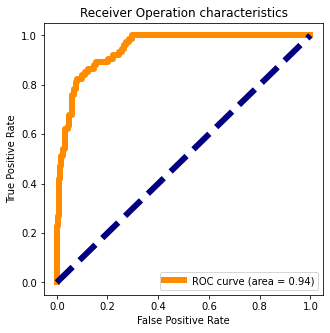

In [151]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresolds = roc_curve(y_test, final_pred_prob, pos_label = 1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5,5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 6, label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1], color = 'navy', lw = 6, linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operation characteristics")
plt.legend(loc = "lower right")
plt.show()

### Deploy Model

In [844]:
import pickle

filename = "GPPD.pkl"
pickle.dump(model, open(filename, 'wb'))

### Loading Model

In [845]:
load = pickle.load(open('GPPD.pkl', 'rb'))
result = load.score(x_test, y_test)
print(result)

0.8199300699300699


### Conclusion

In [846]:
conclusion = pd.DataFrame()
conclusion['Predicted Primary Fuel'] = np.array(model.predict(x_test))
conclusion['Actual Primary Fuel'] = np.array(y_test)

In [848]:
conclusion.sample(25)

Predicted Primary Fuel  Actual Primary Fuel
125                       2                    2
112                       2                    2
218                       6                    6
146                       4                    4
402                       3                    3
466                       7                    1
568                       0                    0
405                       4                    4
406                       4                    4
366                       1                    1
483                       7                    7
279                       4                    4
253                       1                    1
64                        4                    4
557                       7                    7
256                       1                    2
94                        3                    3
61                        7                    7
433                       4                    4
236                       3                    3
354                       6                    6
471                       3                    3
383                       6                    6
536                       4                    4
375                       7                    7

#### 

### Model building for predictions of capacity_mw

In [68]:
df.head()

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   
1         98.0   24.7663    74.6090         Coal              2015.0   
2         39.2   21.9038    69.3732         Wind              2015.0   
3        135.0   23.8712    91.3602          Gas              2004.0   
4       1800.0   21.9603    82.4091         Coal              2015.0   

                                 source                    geolocation_source  
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory  
1                  Ultratech Cement ltd                                   WRI  
2                                   CDM                                   WRI  
3         Central Electricity Authority                                   WRI  
4         Central Electricity Authority                                   WRI

In [69]:
df2 = df.copy() # copying dataframe for model building

In [70]:
obj = df2.select_dtypes(include = 'object').columns

#### Using OrdinalEncoder for making similar dataset for dependent variables

In [71]:
from sklearn.preprocessing import OrdinalEncoder
onc = OrdinalEncoder()

In [72]:
for i in obj:
    df2[i] = onc.fit_transform(df[i].values.reshape(-1,1))

df2.head()

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  source  \
0          2.5   28.1839    73.2407           6.0              2011.0   109.0   
1         98.0   24.7663    74.6090           1.0              2015.0   174.0   
2         39.2   21.9038    69.3732           7.0              2015.0    21.0   
3        135.0   23.8712    91.3602           2.0              2004.0    22.0   
4       1800.0   21.9603    82.4091           1.0              2015.0    22.0   

   geolocation_source  
0                 1.0  
1                 2.0  
2                 2.0  
3                 2.0  
4                 2.0

#### 

## Removing Outliers from the Dataset

In [74]:
from scipy.stats import zscore

z = np.abs(zscore(df2))

# taking thresold value = 3


df_Z = df2[(z<3).all(axis = 1)]

In [75]:
np.where(z>3)  

(array([ 15,  71,  80, 143, 147, 179, 183, 191, 209, 222, 244, 299, 308,
        321, 323, 333, 340, 342, 345, 360, 363, 364, 374, 415, 426, 443,
        453, 477, 481, 483, 492, 493, 498, 518, 537, 540, 545, 572, 576,
        582, 600, 620, 637, 647, 656, 660, 668, 687, 693, 704, 707, 724,
        726, 765, 784, 786, 805, 806, 816, 830, 846, 868, 869, 877, 878,
        893, 898], dtype=int64),
 array([0, 5, 5, 0, 0, 2, 2, 5, 0, 4, 2, 5, 0, 5, 2, 2, 2, 4, 5, 2, 0, 0,
        0, 2, 2, 4, 4, 4, 0, 4, 0, 0, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 0,
        0, 5, 5, 5, 0, 4, 4, 0, 4, 0, 0, 0, 4, 0, 2, 5, 4, 5, 5, 5, 0, 5,
        5], dtype=int64))

In [76]:
print(df_Z.shape)
print(df.shape)

(838, 7)
(905, 7)


In [77]:
percentage = round((905-838)/905*100,2)
print(percentage, "Percentage of data loss")  

7.4 Percentage of data loss


#### 

## Removing Outliers with Interquartile Method

In [78]:
Q1 = df2.quantile(.25)
Q3 = df2.quantile(.75)
IQR = Q3 - Q1

In [80]:
df_IQR_2 = df[~((df2<(Q1 - 1.5*IQR)) | (df2>(Q3 + 1.5*IQR))).any(axis = 1)]

In [82]:
print(df_IQR_2.shape)
print(df2.shape)

(453, 7)
(905, 7)


In [83]:
percentage = round((905-453)/905*100,2)
print(percentage, "Percentage of data loss")  

49.94 Percentage of data loss


### From above two methods of removing outliers we find that Zscore give lesser data loss with respect to interquartile method hence we are selecting Zscore method for removing outliers.

In [84]:
df_Z.describe()

capacity_mw    latitude   longitude  primary_fuel  commissioning_year  \
count   838.000000  838.000000  838.000000    838.000000          838.000000   
mean    278.846588   21.098914   77.098746      3.278043         2005.590692   
std     436.741560    6.142750    4.340465      2.311008           13.989269   
min       0.000000    8.168900   68.644700      0.000000         1958.000000   
25%      16.500000   16.924050   74.301750      1.000000         1999.000000   
50%      54.750000   21.208800   76.786300      3.000000         2015.000000   
75%     350.000000   25.143175   78.948475      6.000000         2015.000000   
max    2000.000000   34.649000   91.900300      7.000000         2018.000000   

           source  geolocation_source  
count  838.000000          838.000000  
mean    42.645585            1.725537  
std     42.056311            0.685115  
min      0.000000            0.000000  
25%     22.000000            2.000000  
50%     22.000000            2.000000  
75%     30.750000            2.000000  
max    177.000000            2.000000

<AxesSubplot:>

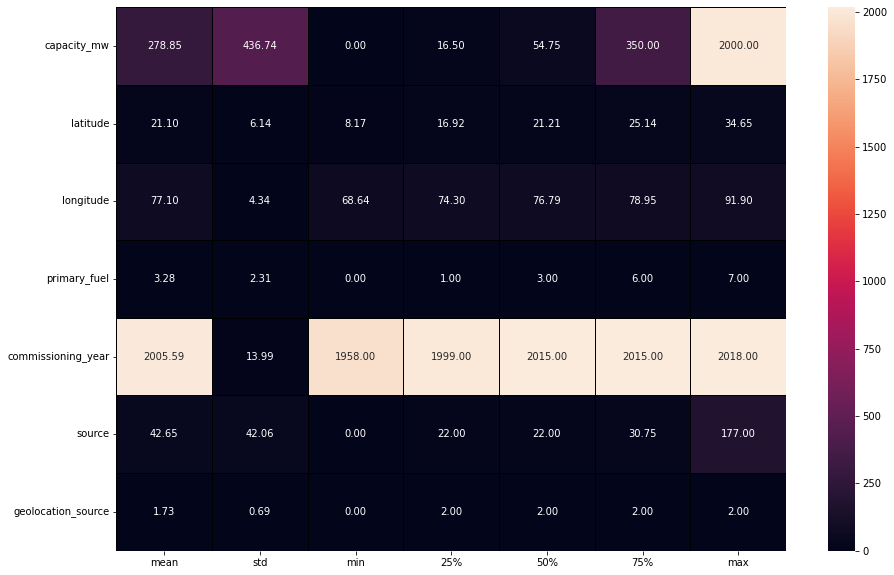

In [85]:
plt.figure(figsize = (15,10))
sns.heatmap(df_Z.describe()[1:].transpose(), annot = True, linecolor='black', linewidths=0.5, fmt = '.2f')

#checking description visually

#### From above code we find that capacity max values are much higher than its dataset value from this we conclude that this column dataset probably having outliers.

### Checking Correlation of the Dataset

In [86]:
df_Z.corr()

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw            1.000000  0.047824   0.265218     -0.412683   
latitude               0.047824  1.000000  -0.013971     -0.010904   
longitude              0.265218 -0.013971   1.000000     -0.390628   
primary_fuel          -0.412683 -0.010904  -0.390628      1.000000   
commissioning_year    -0.065738  0.036970  -0.150974      0.191664   
source                -0.273001  0.072577  -0.249884      0.066178   
geolocation_source     0.237901 -0.194058   0.276323     -0.472409   

                    commissioning_year    source  geolocation_source  
capacity_mw                  -0.065738 -0.273001            0.237901  
latitude                      0.036970  0.072577           -0.194058  
longitude                    -0.150974 -0.249884            0.276323  
primary_fuel                  0.191664  0.066178           -0.472409  
commissioning_year            1.000000  0.328284           -0.268653  
source                        0.328284  1.000000           -0.521690  
geolocation_source           -0.268653 -0.521690            1.000000

<AxesSubplot:>

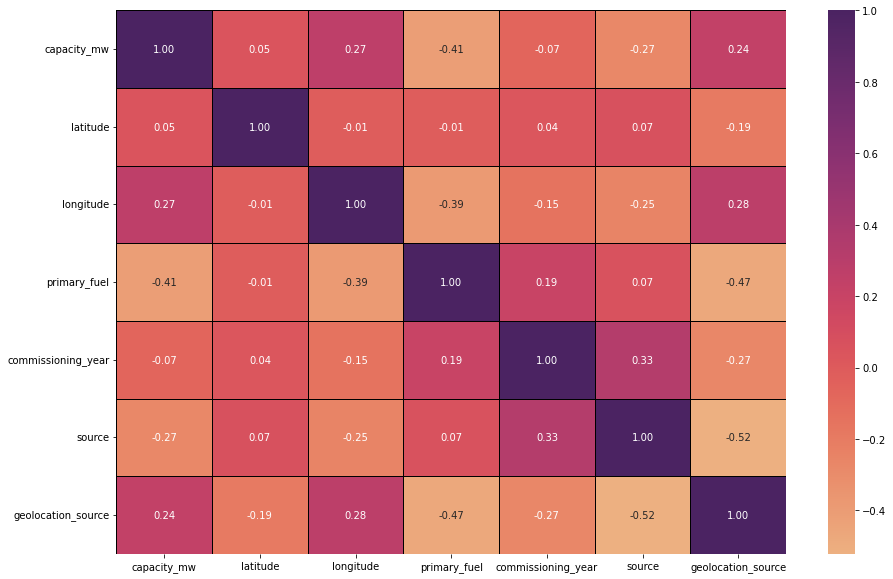

In [87]:
plt.figure(figsize = (15,10))
sns.heatmap(df_Z.corr(), annot = True, linecolor = 'black', linewidths = 1, fmt = '.2f', cmap="flare" )

#### 
- From above code we find that there is normal acceptable correlation between dataset. 
- Also we can say for latitude that there is very less correlation with respect to capacity_mw and latitude.
- Similarily in case of commissioning year too as per data above.

### Checking Positive and Negative Correlation

<AxesSubplot:>

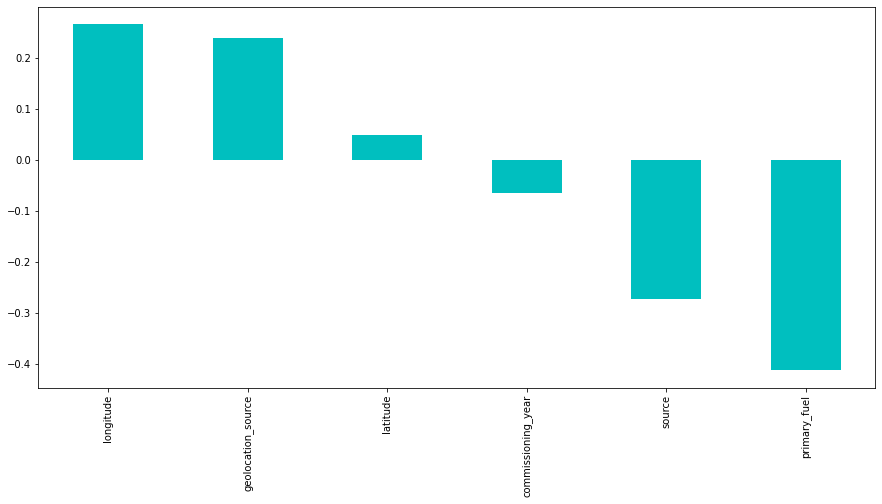

In [88]:
plt.figure(figsize = (15,7))
df_Z.corr()['capacity_mw'].sort_values(ascending = False).drop('capacity_mw').plot(kind = 'bar', color = 'c')

#### Observations: - Above dataset shows longitude, geolocation_source, latitude shows positive correlation with respect to capacity_mw while rest of dataset shows negative correlation.

### Dividing data for feature selection

In [89]:
x1 = df_Z.drop('capacity_mw', axis = 1)
y1 = df_Z['capacity_mw']

In [90]:
print('shape of x1', x1.shape)
print('Shape of y1', y1.shape)

shape of x1 (838, 6)
Shape of y1 (838,)


### Checking skewness of the dataset

In [91]:
x1.skew()

latitude             -0.114604
longitude             0.920393
primary_fuel          0.421718
commissioning_year   -1.491474
source                1.792258
geolocation_source   -2.112259
dtype: float64

In [92]:
# commissioning_year, source, and geolocation_source are categorical type dataset 
# hence dont need to fix skewness on these columns of dataset.

In [93]:
# from sklearn.preprocessing import PowerTransformer
# pw = PowerTransformer('yeo-johnson')

In [94]:
# x1 = pw.fit_transform(x1)
# x1.skew()

### Removing Skewness by log method

In [95]:
x1['longitude'] = np.log1p(x1['longitude']) #now we are using log(1+x) method for removing skewness of longitude.

### Checking multicolinearity of the dataset

In [96]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['Variance'] = x1.columns
    vif["VIF Factor"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
    return vif

In [98]:
calc_vif(x1)  # checking VIF of numerical columns

Variance   VIF Factor
0            latitude    13.556912
1           longitude  5967.631543
2        primary_fuel     4.830162
3  commissioning_year  6173.472591
4              source     3.301687
5  geolocation_source    14.403547

In [99]:
# From above information we find that longitude and commission year show high collinearity but as per observations 
# we know that commissioning year is a categorical dataset thats why it is showing very high correlation.
# Hence due to low dataset we are not dropping it.

In [100]:
#x1.drop('longitude', inplace = True, axis = 1)

#### 

## Standard Scalling

In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [102]:
scale = sc.fit_transform(x1)

In [103]:
x1 = pd.DataFrame(data = scale, columns = x1.columns)

In [104]:
# from sklearn.preprocessing import MinMaxScaler

# sc=MinMaxScaler()
# x1=sc.fit_transform(x1)

#### We predicted models multiple times but r2_score still not not found. Hence we need to fix target dataset.

In [105]:
x1.head()

latitude  longitude  primary_fuel  commissioning_year    source  \
0  1.154079  -0.903897      1.178526            0.386906  1.578694   
1  0.597383  -0.568118     -0.986324            0.673011  3.125164   
2  0.131109  -1.887545      1.611496            0.673011 -0.514988   
3  0.451580   3.111292     -0.553354           -0.113776 -0.491197   
4  0.140312   1.237053     -0.986324            0.673011 -0.491197   

   geolocation_source  
0           -1.059632  
1            0.400848  
2            0.400848  
3            0.400848  
4            0.400848

In [106]:
y1 = np.log(1+y1) # for making similar distribution of dataset

## Feature Selection

In [107]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [138]:
def best_randomstate (model, x, y):
    best_fit = []
    for i in range(0, 200 ) :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = r2_score(y_train, m_predict_train, )
        testing = r2_score(y_test, m_predict_test, )

        if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
            best_fit.append(i)
    return (best_fit)

In [139]:
def check_model (model, x, y, r_list):
    for i in r_list :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = r2_score(y_train, m_predict_train, )
        testing = r2_score(y_test, m_predict_test, )

        print('At random state', i, 'the training r2_score is :', training)
        print('At random state', i, 'the testing r2_score is :', testing) 
        print('_________________________________________________________________')

In [161]:
def final(algo, x, y, best_fit):
    
    model = algo()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit)
    model.fit(x_train, y_train)
    
    # predict the training set
    m_predict_train = model.predict(x_train)
    m_predict_test = model.predict(x_test)
    
    training = r2_score(y_train, m_predict_train )
    testing = r2_score(y_test, m_predict_test, )

    print('Training r2_score is :', training)
    print('Testing r2_score is :', testing) 
    
    print('__________________________________________________________________')
    print('Mean Squared Error: ', mean_squared_error(m_predict_test, y_test) )
    print('Mean Absolute error: ', mean_absolute_error(m_predict_test, y_test) )
    print('___________________________________________________________________')

    plt.figure(figsize = (10, 5))
    plt.scatter(x = y_test, y = m_predict_test, color = 'r')
    plt.plot(y_test, y_test, color = 'b')
    plt.xlabel('Actual', fontsize= 10 )
    plt.ylabel('Predicted', fontsize = 10)
    plt.title(algo, fontsize = 15)

## Model 1 Linear Regression

In [142]:
best_fit = best_randomstate(LinearRegression,x1, y1)  #finding best random state

In [143]:
print(best_fit)

[9, 13, 20, 24, 29, 35, 41, 53, 62, 92, 102, 104, 115, 127, 150, 157, 172, 180, 197]


In [144]:
check_model(LinearRegression, x1,y1, best_fit)

At random state 9 the training r2_score is : 0.4302373458115407
At random state 9 the testing r2_score is : 0.4322650534445235
_________________________________________________________________
At random state 13 the training r2_score is : 0.42631922719068394
At random state 13 the testing r2_score is : 0.4338719924986447
_________________________________________________________________
At random state 20 the training r2_score is : 0.4343425077402969
At random state 20 the testing r2_score is : 0.42808113287551985
_________________________________________________________________
At random state 24 the training r2_score is : 0.4316707211377546
At random state 24 the testing r2_score is : 0.43009080610167727
_________________________________________________________________
At random state 29 the training r2_score is : 0.4332818591164559
At random state 29 the testing r2_score is : 0.43383843899198526
_________________________________________________________________
At random state 35 the 

Training r2_score is : 0.4324933580268806
Testing r2_score is : 0.4337521255532172
__________________________________________________________________
Mean Squared Error:  1.9254702369992036
Mean Absolute error:  1.1670193353277738
___________________________________________________________________


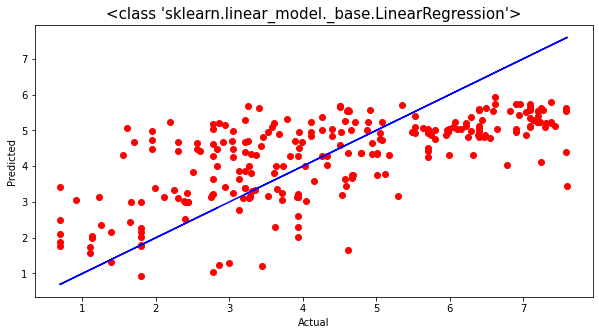

In [148]:
final(LinearRegression, x1, y1, 180)

In [156]:
for i in range (2, 15):
    cv = cross_val_score(LinearRegression(), x1, y1, cv = i).mean()
    print('cv score is', cv, 'at cross fold value', i)
    print('----------------------'+"\n")

cv score is 0.41304210481344406 at cross fold value 2
----------------------

cv score is 0.42104256798412765 at cross fold value 3
----------------------

cv score is 0.41891612407957896 at cross fold value 4
----------------------

cv score is 0.4185232136197234 at cross fold value 5
----------------------

cv score is 0.42141985629921574 at cross fold value 6
----------------------

cv score is 0.4069803454470401 at cross fold value 7
----------------------

cv score is 0.41420766770582684 at cross fold value 8
----------------------

cv score is 0.40731432121447464 at cross fold value 9
----------------------

cv score is 0.41007739831075113 at cross fold value 10
----------------------

cv score is 0.4127141012739637 at cross fold value 11
----------------------

cv score is 0.4013968296304475 at cross fold value 12
----------------------

cv score is 0.41086118339303457 at cross fold value 13
----------------------

cv score is 0.4000573423743547 at cross fold value 14
----------

## Model 2 SVR

In [149]:
best_fit1 = best_randomstate(SVR, x1, y1)   #finding best random state
print(best_fit1)

[4, 8, 63, 73, 89, 122, 157, 165, 183]


In [151]:
check_model(SVR, x1, y1, best_fit1)

At random state 4 the training r2_score is : 0.5485719604143104
At random state 4 the testing r2_score is : 0.5453524421884253
_________________________________________________________________
At random state 8 the training r2_score is : 0.563752141185412
At random state 8 the testing r2_score is : 0.5555597450880809
_________________________________________________________________
At random state 63 the training r2_score is : 0.5530283753114804
At random state 63 the testing r2_score is : 0.5485547122513246
_________________________________________________________________
At random state 73 the training r2_score is : 0.5564941552399526
At random state 73 the testing r2_score is : 0.5637710895619359
_________________________________________________________________
At random state 89 the training r2_score is : 0.5571812448989792
At random state 89 the testing r2_score is : 0.5642211230195673
_________________________________________________________________
At random state 122 the traini

Training r2_score is : 0.5561246086906337
Testing r2_score is : 0.5600640575007838
__________________________________________________________________
Mean Squared Error:  1.4662881861799664
Mean Absolute error:  0.9780115512646493
___________________________________________________________________


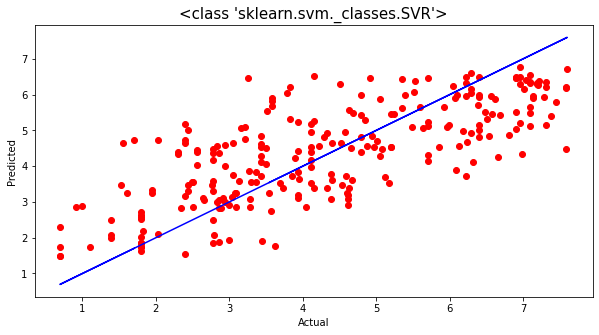

In [152]:
final(SVR, x1, y1, 157) 

In [157]:
for i in range (2, 15):
    cv = cross_val_score(SVR(), x1, y1, cv = i).mean()
    print('cv score is', cv, 'at cross fold value', i)
    print('----------------------'+"\n")

cv score is 0.47919232161156633 at cross fold value 2
----------------------

cv score is 0.5058208150591859 at cross fold value 3
----------------------

cv score is 0.4996087905924329 at cross fold value 4
----------------------

cv score is 0.5075946551522399 at cross fold value 5
----------------------

cv score is 0.5062983621156246 at cross fold value 6
----------------------

cv score is 0.4994771025531573 at cross fold value 7
----------------------

cv score is 0.5042917701982479 at cross fold value 8
----------------------

cv score is 0.5020034923943789 at cross fold value 9
----------------------

cv score is 0.5015093459761131 at cross fold value 10
----------------------

cv score is 0.5074129726930307 at cross fold value 11
----------------------

cv score is 0.4997216319342765 at cross fold value 12
----------------------

cv score is 0.5080143776852757 at cross fold value 13
----------------------

cv score is 0.49409908864730884 at cross fold value 14
----------------

## Model 3: Ridge

In [158]:
best_fit2 = best_randomstate(Ridge, x1, y1)  #finding best random state
print(best_fit2)

[9, 13, 20, 24, 29, 35, 41, 53, 62, 92, 102, 104, 115, 127, 150, 157, 172, 180, 197]


In [159]:
check_model(Ridge, x1, y1, best_fit2)

At random state 9 the training r2_score is : 0.43023638151432997
At random state 9 the testing r2_score is : 0.43211821510315196
_________________________________________________________________
At random state 13 the training r2_score is : 0.42631746499642176
At random state 13 the testing r2_score is : 0.434084923012407
_________________________________________________________________
At random state 20 the training r2_score is : 0.43434130811090166
At random state 20 the testing r2_score is : 0.4280129760345276
_________________________________________________________________
At random state 24 the training r2_score is : 0.4316693892700043
At random state 24 the testing r2_score is : 0.430097843086252
_________________________________________________________________
At random state 29 the training r2_score is : 0.43328063156232177
At random state 29 the testing r2_score is : 0.43380588390732433
_________________________________________________________________
At random state 35 the 

Training r2_score is : 0.43249222589310876
Testing r2_score is : 0.43363468599880595
__________________________________________________________________
Mean Squared Error:  1.9258695786601083
Mean Absolute error:  1.167248197490882
___________________________________________________________________


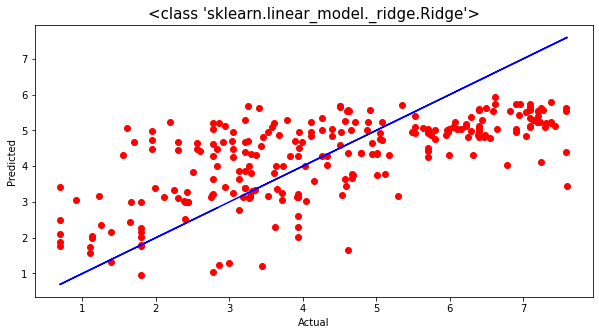

In [173]:
final(Ridge, x1,y1, 180)

In [163]:
for i in range (2, 15):
    cv = cross_val_score(Ridge(), x1, y1, cv = i).mean()
    print('cv score is', cv, 'at cross fold value', i)
    print('----------------------'+"\n")

cv score is 0.41326382002903855 at cross fold value 2
----------------------

cv score is 0.4210980538475188 at cross fold value 3
----------------------

cv score is 0.4189802194140906 at cross fold value 4
----------------------

cv score is 0.4185649176415122 at cross fold value 5
----------------------

cv score is 0.42144968684777223 at cross fold value 6
----------------------

cv score is 0.40701669624557946 at cross fold value 7
----------------------

cv score is 0.4142428390374092 at cross fold value 8
----------------------

cv score is 0.4073392526283183 at cross fold value 9
----------------------

cv score is 0.4100985479092586 at cross fold value 10
----------------------

cv score is 0.41273542012230285 at cross fold value 11
----------------------

cv score is 0.4014258129181101 at cross fold value 12
----------------------

cv score is 0.41088677880436525 at cross fold value 13
----------------------

cv score is 0.40008265116137887 at cross fold value 14
------------

## Model 4 AdaBoostRegressor

In [169]:
best_fit3 = best_randomstate(AdaBoostRegressor, x1, y1)  #finding best random state
print(best_fit3)

[4, 10, 29, 76, 89, 129, 135, 160, 169, 199]


In [170]:
check_model(AdaBoostRegressor, x1, y1, best_fit3)

At random state 4 the training r2_score is : 0.5853771021375047
At random state 4 the testing r2_score is : 0.5963129804311368
_________________________________________________________________
At random state 10 the training r2_score is : 0.586021295777365
At random state 10 the testing r2_score is : 0.5944062557649337
_________________________________________________________________
At random state 29 the training r2_score is : 0.5637442117761171
At random state 29 the testing r2_score is : 0.5580557489964444
_________________________________________________________________
At random state 76 the training r2_score is : 0.5946400571424353
At random state 76 the testing r2_score is : 0.5872615377052481
_________________________________________________________________
At random state 89 the training r2_score is : 0.5727304585325323
At random state 89 the testing r2_score is : 0.5777303849437435
_________________________________________________________________
At random state 129 the trai

Training r2_score is : 0.5937935951863792
Testing r2_score is : 0.5922901284904851
__________________________________________________________________
Mean Squared Error:  1.4027210044238105
Mean Absolute error:  0.954201657681765
___________________________________________________________________


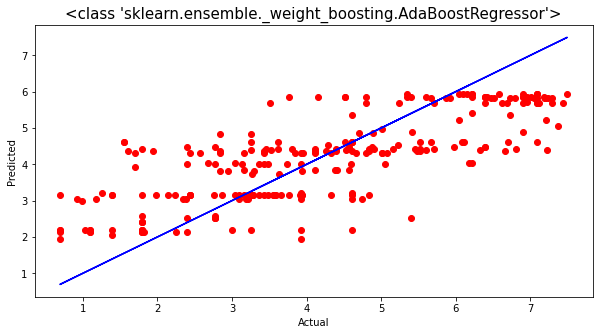

In [171]:
final(AdaBoostRegressor, x1, y1, 199)

In [172]:
for i in range (2, 15):
    cv = cross_val_score(AdaBoostRegressor(), x1, y1, cv = i).mean()
    print('cv score is', cv, 'at cross fold value', i)
    print('----------------------'+"\n")

cv score is 0.5589130976173413 at cross fold value 2
----------------------

cv score is 0.558305575868973 at cross fold value 3
----------------------

cv score is 0.5564466155786003 at cross fold value 4
----------------------

cv score is 0.5457542263150967 at cross fold value 5
----------------------

cv score is 0.5494201094382467 at cross fold value 6
----------------------

cv score is 0.5319211434775337 at cross fold value 7
----------------------

cv score is 0.54290028449901 at cross fold value 8
----------------------

cv score is 0.5499299997696308 at cross fold value 9
----------------------

cv score is 0.5475797529471071 at cross fold value 10
----------------------

cv score is 0.540886775497106 at cross fold value 11
----------------------

cv score is 0.5402120186446061 at cross fold value 12
----------------------

cv score is 0.5460475252944614 at cross fold value 13
----------------------

cv score is 0.5358982553361481 at cross fold value 14
----------------------

#### AdaboostRegressor shows different different result when we run again to find out best random state hence this model being overfitted hence we can't consider it.

### Finalizing Model

In [174]:
# models                            R2_score score          CV score           CV state    Mean Squared Error

# Linear Regression                 0.4337521255532172   0.42141985629921574    6      1.9254702369992036
# Ridge  Regression                 0.43363468599880595  0.42144968684777223   6       1.9258695786601083    
# SVR                               0.5600640575007838   0.5074129726930307    11       1.4662881861799664

### Observations: 
   - We are not considering SVR because its CV score is much far away from the r2 score.
   
   
   - Linear Regression show similar result as ridge but when we find out again a random state it gives different values hence we      can't consider it. As model being biased after building model.
   
   
   - Ridge regression show good result as per dataset with negligible difference in CV score hence we can consider it.

In [175]:
model = Ridge()
# using hyper parameter tuning for Ridge regression to find out best criterion

# param (alpha=1.0, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False,
# random_state=None,)

# checking above params takes too much time hence boolean type params not captured.

param = {"alpha": [0.1, 0.01, 0.001, 1, 0.5], 'max_iter': [100,200,300], 'tol': [.0001, .0002, .0003, .0004],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}


gd = GridSearchCV(model, param_grid=param, cv = 5)
gd.fit(x1, y1)
gd.best_params_

# {'alpha': 1, 'max_iter': 200, 'solver': 'saga', 'tol': 0.0004}

{'alpha': 1, 'max_iter': 200, 'solver': 'saga', 'tol': 0.0004}

In [176]:
final_model = Ridge(alpha=1, max_iter=100, solver='sparse_cg', tol=0.0004)

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 180)
final_model.fit(x_train, y_train)
pred_train = final_model.predict(x_train)
pred_test = final_model.predict(x_test)
print("At random state", 180 , "model giving best accuracy score","\n")
Test_accuracy = r2_score(y_test, pred_test)
print('Testing accuracy:- ', Test_accuracy*100)
print("\n")
print('--------------------------------------')
print('Mean squared error:- ', mean_squared_error(pred_test, y_test) )
print('Mean absolute error:- ', mean_absolute_error(pred_test, y_test) )
print('Root Mean squared error:-',np.sqrt(mean_squared_error(pred_test, y_test)))
        

At random state 180 model giving best accuracy score 

Testing accuracy:-  43.36346859988056


--------------------------------------
Mean squared error:-  1.9258695786601094
Mean absolute error:-  1.1672481974908826
Root Mean squared error:- 1.387757031565724


In [181]:
cv = cross_val_score(final_model, x1, y1, cv = 6).mean()
print('cv score is', cv, 'at cross fold value', 6)

cv score is 0.4214577985635175 at cross fold value 6


#### Checking Coef.

<AxesSubplot:title={'center':'Coefficient'}>

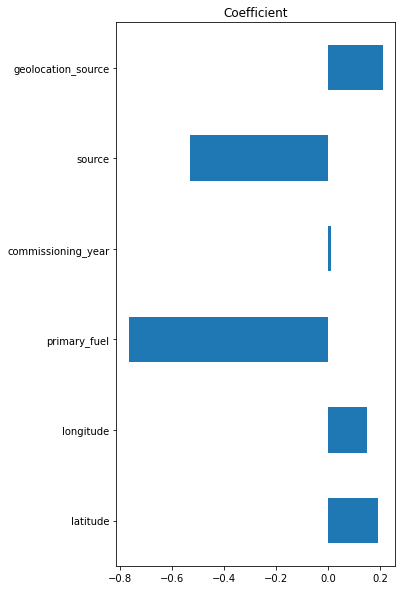

In [184]:
coef_final_model = pd.Series(final_model.coef_, x1.columns)
coef_final_model.sort_values()
plt.figure(figsize = (5,10))
coef_final_model.plot(kind = 'barh', title = 'Coefficient')

### Checking performance with Graph

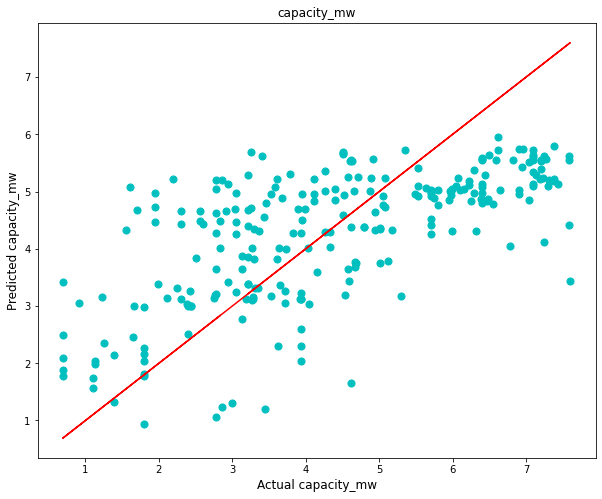

In [187]:
final_pred = final_model.predict(x_test)
plt.figure(figsize = (10, 8))
plt.scatter(x = y_test, y  = final_pred, color = 'c', s = 50)
plt.plot(y_test, y_test, color = 'r')
plt.xlabel('Actual capacity_mw', fontsize = 12)
plt.ylabel('Predicted capacity_mw', fontsize = 12)
plt.title('capacity_mw')
plt.show()

### Deploy Model

In [188]:
import pickle

filename = "Powerplantcapacity.pkl"
pickle.dump(final_model, open(filename, 'wb'))

### Loading Model

In [189]:
load = pickle.load(open('Powerplantcapacity.pkl', 'rb'))
result = load.score(x_test, y_test)
print(result)

0.4336346859988056


### Conclusion

In [190]:
conclusion = pd.DataFrame()
conclusion['Predicted capacity_mw price'] = np.array(final_model.predict(x_test))
conclusion['Actual capacity_mw price'] = np.array(y_test)

In [194]:
conclusion.sample(10)

Predicted capacity_mw price  Actual capacity_mw price
155                     5.739386                  6.957497
158                     1.987213                  1.131402
175                     3.128120                  3.280911
10                      4.860578                  5.949340
204                     2.297389                  3.618993
30                      3.861029                  3.218876
185                     5.105724                  6.042633
131                     3.001296                  2.442347
228                     2.162595                  1.791759
34                      5.573116                  6.398595